# Data Wrangling | News ( HK NLP Project )

# Table of Contents<a id='#wrangle'></a>
* [1.0 News Wrangling](#2_Data_wrangling)
  * [1.1 Contents](#Contents)
  * [1.2 Imports & Set Up](#imports)
  * [1.3 Initial Review before Regex](#irbr)
  * [1.4 Regex](#regex)
    * [1.4.1 Title](#title_main_df)
      * [Non-ascii & Unclean Values](#non_ascii_title)
      * [Duplicates](#title_duplicates)
      * [Sentiment Intensity Analyzer](#sia_title)
      * [Stop Words](#title_stop_words)
      * [Stemming](#title_stem)
      * [Lemmatization](#title_lem)
      * [TfidfVectorizer](#title_v_tfid)
      * [CountVectorizer](#title_v_count_vec)
    * [1.4.2 Article](#article_main_df)
      * [Non-ascii & Unclean Values](#non_ascii_article)
      * [Duplicates](#article_duplicates)
      * [Sentiment Intensity Analyzer](#sia_article)
      * [Stop Words](#article_stop_words)
      * [Stemming](#article_stem)
      * [Lemmatization](#article_lem)
      * [TfidfVectorizer](#article_v_tfid)
      * [CountVectorizer](#article_v_count_vec)
* [2.0 Exploratory Data Analysis (EDA)](#eda)
  * [2.1 Contents](#eda_contents)
  * [2.2 Title EDA](#title_eda)
    * [2.2.1 TfidfVectorizer](#title_eda_tfid)
    * [2.2.2 CountVectorizer](#title_eda_count_vec)
    * [2.2.3 xxxxxxx](#_____)
  * [2.3 Article_EDA](#article_eda)
    * [2.3.1 TfidfVectorizer](#article_eda_tfid)
    * [2.3.2 CountVectorizer](#article_eda_count_vec)
    * [2.3.3 xxxxxxx](#_____)
  * [2.4 Overall EDA](#overall_eda)
    * [2.4.1 xxxxxxx](#_____)
    * [2.4.2 xxxxxxx](#_____)
    * [2.4.3 xxxxxxx](#_____)
    * [2.4.4 xxxxxxx](#_____)
    * [2.4.5 xxxxxxx](#_____)  
  * [2.5 EDA Summary](#eda_summary)



# **1.0 News Wrangling**<a id='Contents'></a>

# **1.1 Contents**<a id='Contents'></a>

In this section, we will import & clean the data so it can better handle our statistical analysis.

# **1.2 Imports & Set Up**<a id='imports'></a>

**Importing the necessary tools** required & confirming our version.

In [496]:
# Main Imports
import os
import sys
import statistics
from scipy.stats import skew
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
%matplotlib inline
import datetime
import time
import warnings
warnings.filterwarnings("ignore")
%reload_ext watermark
import enchant 

# NLP Imports
import re
import string
import requests
import urllib.request
import nltk
import pickle
import emoji
from better_profanity import profanity
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from spacy.language import Language

from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import spacy
import en_core_web_sm
nltk.download("stopwords")
stop = stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

results = Counter()

# from polyglot.text import Text

# The below 2 may be required
# import nltk
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# Still importing twint
import twint
import nest_asyncio
nest_asyncio.apply()

%watermark -d -t -v -p pandas

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

pandas: 1.1.3



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Importing the news** which were scraped & saved elsewhere.

In [497]:
cd

C:\Users\rands


In [498]:
# The international news articles
bbc_1 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_1.csv')
bbc_2 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_2.csv')
nytimes_3 = pd.read_csv('./_Capstone_Two_NLP/data/_news/nytimes_3.csv')
forbes_4 = pd.read_csv('./_Capstone_Two_NLP/data/_news/forbes_4.csv')
insider_5 = pd.read_csv('./_Capstone_Two_NLP/data/_news/insider_5.csv')
abc_6 = pd.read_csv('./_Capstone_Two_NLP/data/_news/abc_6.csv')
cnn_7 = pd.read_csv('./_Capstone_Two_NLP/data/_news/cnn_7.csv')
nypost_8 = pd.read_csv('./_Capstone_Two_NLP/data/_news/nypost_8.csv')
nippon_9 = pd.read_csv('./_Capstone_Two_NLP/data/_news/nippon_9.csv')
bbc_10 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_10.csv')
bbc_11 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_11.csv')
bbc_12 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_12.csv')
bbc_13 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_13.csv')
bbc_14 = pd.read_csv('./_Capstone_Two_NLP/data/_news/bbc_14.csv')
theDiplomat_15 = pd.read_csv('./_Capstone_Two_NLP/data/_news/theDiplomat_15.csv')

# China news articles
peoples_daily_1 = pd.read_csv('./_Capstone_Two_NLP/data/_news/peoples_daily_1.csv')
peoples_daily_2 = pd.read_csv('./_Capstone_Two_NLP/data/_news/peoples_daily_2.csv')
peoples_daily_3 = pd.read_csv('./_Capstone_Two_NLP/data/_news/peoples_daily_3.csv')
peoples_daily_4 = pd.read_csv('./_Capstone_Two_NLP/data/_news/peoples_daily_4.csv')
peoples_daily_5 = pd.read_csv('./_Capstone_Two_NLP/data/_news/peoples_daily_5.csv')
globaltimes_6 = pd.read_csv('./_Capstone_Two_NLP/data/_news/globaltimes_6.csv')
globaltimes_7 = pd.read_csv('./_Capstone_Two_NLP/data/_news/globaltimes_7.csv')
globaltimes_8 = pd.read_csv('./_Capstone_Two_NLP/data/_news/globaltimes_8.csv')
min_foreign_aff_9 = pd.read_csv('./_Capstone_Two_NLP/data/_news/min_foreign_aff_9.csv')
min_foreign_aff_10 = pd.read_csv('./_Capstone_Two_NLP/data/_news/min_foreign_aff_10.csv')
xinhua_11 = pd.read_csv('./_Capstone_Two_NLP/data/_news/xinhua_11.csv')
xinhua_12 = pd.read_csv('./_Capstone_Two_NLP/data/_news/xinhua_12.csv')
theStandard_13 = pd.read_csv('./_Capstone_Two_NLP/data/_news/theStandard_13.csv')
china_daily_14 = pd.read_csv('./_Capstone_Two_NLP/data/_news/china_daily_14.csv')
hkgovt_15 = pd.read_csv('./_Capstone_Two_NLP/data/_news/hkgovt_15.csv')


**Pulling them all together into a data frame.**

In [499]:
# setting up the main data frame for news
news = pd.DataFrame()

In [500]:
# Int'l news articles
news = news.append(bbc_1, ignore_index=True)
news = news.append(bbc_2, ignore_index=True)
news = news.append(nytimes_3, ignore_index=True)
news = news.append(forbes_4, ignore_index=True)
news = news.append(insider_5, ignore_index=True)
news = news.append(abc_6, ignore_index=True)
news = news.append(cnn_7, ignore_index=True)
news = news.append(nypost_8, ignore_index=True)
news = news.append(nippon_9, ignore_index=True)
news = news.append(bbc_10, ignore_index=True)
news = news.append(bbc_11, ignore_index=True)
news = news.append(bbc_12, ignore_index=True)
news = news.append(bbc_13, ignore_index=True)
news = news.append(bbc_14, ignore_index=True)
news = news.append(theDiplomat_15, ignore_index=True)

# China news articles
news = news.append(peoples_daily_1, ignore_index=True)
news = news.append(peoples_daily_2, ignore_index=True)
news = news.append(peoples_daily_3, ignore_index=True)
news = news.append(peoples_daily_4, ignore_index=True)
news = news.append(peoples_daily_5, ignore_index=True)
news = news.append(globaltimes_6, ignore_index=True)
news = news.append(globaltimes_7, ignore_index=True)
news = news.append(globaltimes_8, ignore_index=True)
news = news.append(min_foreign_aff_9, ignore_index=True)
news = news.append(min_foreign_aff_10, ignore_index=True)
news = news.append(xinhua_11, ignore_index=True)
news = news.append(xinhua_12, ignore_index=True)
news = news.append(theStandard_13, ignore_index=True)
news = news.append(china_daily_14, ignore_index=True)
news = news.append(hkgovt_15, ignore_index=True)


In [501]:
# Here I am structuring a color scale for heatmaps which will be used later

cdict = {'green':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'red': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

# Create the colormap using the dictionary
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)


Adding a **new column for word count** on each article **for reference.**

In [502]:
word_counts = news.article.str.len().value_counts()
word_counts_list = [word_counts]
df_word_counts = pd.DataFrame(word_counts_list).T
df_word_counts['Word_count'] = df_word_counts.index
df_word_counts = df_word_counts.drop(['article'], axis=1)
df_word_counts = df_word_counts.reset_index()
df_word_counts = df_word_counts.drop(['index'], axis=1)
news['word_count'] = df_word_counts
len(df_word_counts)

30

Adding one more **new column called `local`** on each article for reference. **`local` is different from `country` in that it just seperates China & Hong Kong ( `Local` ) from the rest ( `Intl` ).**

I would also like to make something explicitly clear that **`Intl` sources are listed above those from `Local` in numeric order within the dataframe but are not deemed listed above in integrity; in other words, the rational for the dataframe structure is:**
   * Based on no rational reason & 
   * Won't have an affect on our findings

In [503]:
#we will create the new column here
news['local'] = np.where(news.country == 'China', 'Local', 
         (np.where(news.country == 'Hong Kong', 'Local', 'Intl')))
# We will move this new column in the middle
column_names = ['file_name', 'date', 'source', 'country','local','title', 'article',
       'word_count']
news = news.reindex(columns=column_names)

In [504]:
news.tail(2)

,file_name,date,source,country,local,title,article,word_count
28,china_daily_14,2020-06-20,China Daily,China,Local,Wide support for proposed national security law,Residents sign to support the national securit...,4028
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,CE welcomes passage of The Law of the People's...,In response to the passage of The Law of the P...,15490


In [505]:
news.head(2)

,file_name,date,source,country,local,title,article,word_count
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,6143
1,bbc_2,2020-07-01,BBC,UK,Intl,Hong Kong's new security law: Why it scares pe...,China has introduced a new national security l...,5324


Please note, **the News was seperated between International ( Intl ) & China sources. The numbers of the `file_name` were assigned in a manner to ensure an equal number of articles for both Int'l & China were pulled in.**

I would also like to make explicitly clear that **Int'l sources are above those from China:**
   * For absolutely no reason & 
   * This structure won't have an affect on our findings.

**Data Defined**

In this short section, we will highlight what the columns are referring too.

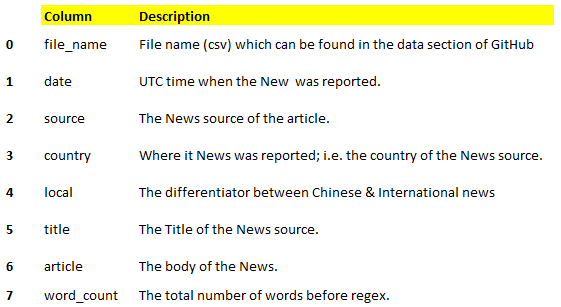

**I believe `word_count` numbers are incorrect.** Something to look at further at after stop word removal & other cleaning.

In [506]:
print(' For reference, we have:','\n',
      news.shape[0],'| Rows; meaning news articles &','\n',
      news.shape[1],' | Columns','\n','\n',
     'As we proceed, this will change.')

 For reference, we have: 
 30 | Rows; meaning news articles & 
 8  | Columns 
 
 As we proceed, this will change.


In [507]:
#to confirm no cells are null
news.isnull().values.any()

False

In [508]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_name   30 non-null     object
 1   date        30 non-null     object
 2   source      30 non-null     object
 3   country     30 non-null     object
 4   local       30 non-null     object
 5   title       30 non-null     object
 6   article     30 non-null     object
 7   word_count  30 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


The `date` column is an object; I will convert it to `datetime`.

In [509]:
news['date'] = pd.to_datetime(news['date'], format='%Y-%m-%d')
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   file_name   30 non-null     object        
 1   date        30 non-null     datetime64[ns]
 2   source      30 non-null     object        
 3   country     30 non-null     object        
 4   local       30 non-null     object        
 5   title       30 non-null     object        
 6   article     30 non-null     object        
 7   word_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.0+ KB


In [510]:
#count of unique values for every column, regardless of data type
news.nunique()

file_name     30
date          15
source        16
country        5
local          2
title         30
article       30
word_count    30
dtype: int64

When looking at the unique columns, **I would expect the following to have 30 unique observations with the supporting reasons**:
   * `file_name`
     * I assigned the name
   * `title` & `article`
     * Some assurance that duplicates weren't chosen
   * `word_count`
     * It would be odd to have 2 articles with the same value here

**I would also expect `local` to have 2 as I assigned those.**

# 1.3 Initial Review before Regex<a id='irbr'></a>

Here we will start a **quick look** at what we have at this point. No real goal to be achieved other than **getting our feet wet.**

In [511]:
print(' One reasonable observation to note would be the United Kingdom "UK" carried',
     (round(news.country.str.count("UK").sum()/news.country.str.count("China|Hong Kong").sum(),2)*100),
      'percent of the Intl news.','\n',
     'This number makes sense as Hong Kong was previously a British colony.','\n','\n',
     'Meanwhile, the United States "US" also carried,',
     (round(news.country.str.count("US").sum()/news.country.str.count("China|Hong Kong").sum(),2)*100),
      'percent of the Intl news.','\n',
      'This result may be due to the US\'s political administration, at the time, being very engaging on their China affairs.'
)

 One reasonable observation to note would be the United Kingdom "UK" carried 47.0 percent of the Intl news. 
 This number makes sense as Hong Kong was previously a British colony. 
 
 Meanwhile, the United States "US" also carried, 47.0 percent of the Intl news. 
 This result may be due to the US's political administration, at the time, being very engaging on their China affairs.


In [512]:
source_uni_name = (news.groupby('local')['source'].value_counts())
source_uni_name_df = pd.DataFrame(source_uni_name)
source_uni_name_df.columns = ['count']
source_uni_name_df = source_uni_name_df.reset_index()
int_max = source_uni_name_df[(source_uni_name_df['local'] == 'Intl')]
int_max_num = int_max['count'].max()
int_max_name = int_max.source[0]
local_max = source_uni_name_df[(source_uni_name_df['local'] == 'Local')]
local_max_num = local_max['count'].max()
local_max.reset_index(inplace = True)
local_max_name = local_max.source[0]

source_uni = (news.groupby('local')['source'].nunique())
print(' Furthermore, both the China & Intl sources in the dataframe are evenly split within each section; whereby on average','\n',
      source_uni[0],'different sources were pulled for the Intl section &','\n',
     source_uni[1],'different sources were pulled for the China section','\n','\n',
     'Representing on average','\n',
           'Each source represented',round(((news.local.str.count('Intl').sum())/source_uni[0]),1),'articles for the Intl section.''\n',
     'Each source represented',round(((news.local.str.count('Local').sum())/source_uni[1]),1),'articles for the Local section.','\n','\n',
      'That said, it may be noted:','\n',
      int_max_name, 'contributed',int_max_num,'articles; representing',(round(int_max_num/news.local.str.count('Intl').sum(),2)*100),'percent of the Intl section.''\n',
      local_max_name, 'contributed',local_max_num,'articles; representing',(round(local_max_num/news.local.str.count('Local').sum(),2)*100),'percent of the Local section.'
)

 Furthermore, both the China & Intl sources in the dataframe are evenly split within each section; whereby on average 
 9 different sources were pulled for the Intl section & 
 7 different sources were pulled for the China section 
 
 Representing on average 
 Each source represented 1.7 articles for the Intl section.
 Each source represented 2.1 articles for the Local section. 
 
 That said, it may be noted: 
 BBC contributed 7 articles; representing 47.0 percent of the Intl section.
 People's Daily contributed 5 articles; representing 33.0 percent of the Local section.


We will have another**quick look** at what we have at this point. No real goal to be achieved other than **getting our feet wetter.**

In [513]:
pre_scrape_total = news.word_count.sum()
pre_scrape_av = news.word_count.mean()

print('Words before cleaning','\n',
    "{:,}".format(pre_scrape_total),'| Total Words', '\n',
     "{:,}".format(round(pre_scrape_av)), '  | Average # of Words')

Words before cleaning 
 195,709 | Total Words 
 6,524   | Average # of Words


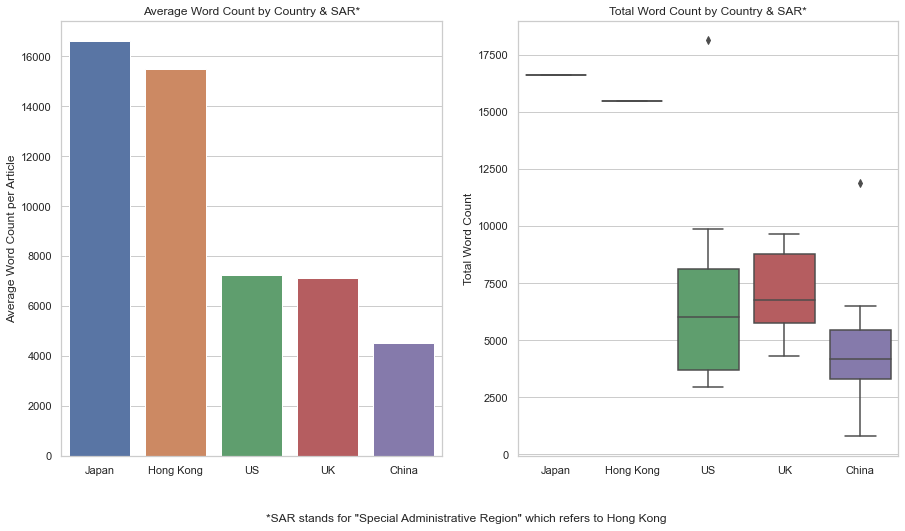

In [514]:
country_comp = pd.DataFrame(news.groupby('country')['word_count'].mean())
country_comp = country_comp.reset_index()

fig = plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")

# Setting up the Bar Chart
plt.subplot(121)
ax = sns.barplot(x="country", y="word_count", data=country_comp, 
                 order=country_comp.sort_values('word_count',ascending=False).country)
ax.set(xlabel='', ylabel='Average Word Count per Article', title='Average Word Count by Country & SAR*')

# Setting up the Box Plot
plt.subplot(122)
ax = sns.boxplot(x="country", y="word_count", data=news,
                order=country_comp.sort_values('word_count',ascending=False).country)
ax.set(xlabel='', ylabel='Total Word Count', title='Total Word Count by Country & SAR*')
txt="*SAR stands for \"Special Administrative Region\" which refers to Hong Kong"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()


Before heading to `Regex` **we will hold an original aside for future reference**.

In [515]:
# index=False below so that we don't get the dataframe index on the side; we just use the excel index
news.to_csv('./_Capstone_Two_NLP/data/_news/_main_holdings/news_bf_regex.csv', index=False)

print('Complete')

Complete


# 1.4 Regex<a id='regex'></a>

Taking a quick look at what we will work with in the dataframe.

In [516]:
news.head(2)

,file_name,date,source,country,local,title,article,word_count
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,China has passed a wide-ranging new security l...,6143
1,bbc_2,2020-07-01,BBC,UK,Intl,Hong Kong's new security law: Why it scares pe...,China has introduced a new national security l...,5324


In [517]:
news.tail(2)

,file_name,date,source,country,local,title,article,word_count
28,china_daily_14,2020-06-20,China Daily,China,Local,Wide support for proposed national security law,Residents sign to support the national securit...,4028
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,CE welcomes passage of The Law of the People's...,In response to the passage of The Law of the P...,15490


Before we proceed, I shall note that the columns `file_name`, `date`, `source`, `country`, & `local` will be used throughout the process but are "untouchable" meaning, they are observations based on reality.

The remaining columns will goes through the cleaning process with the help of `regex`.

# 1.4.1 Title<a id='title'></a>

We will start with the `title`. We will also create a seperate data frame for both `title` & `article` which may be required once we the vectorization step.

In [518]:
news_title = news.copy()
news_title = news_title.drop(columns=['article','word_count'],axis=1)

In [519]:
news_title.head(2)

,file_name,date,source,country,local,title
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...
1,bbc_2,2020-07-01,BBC,UK,Intl,Hong Kong's new security law: Why it scares pe...


<a id='non_ascii_title'></a>**`Non-ascii & Unclean Values` |** We will identify & remove unwanted characters as well as **non-ascii values**; the American Standard Code for Information Interchange; not American English.

Identifying

In [520]:
df_news_title = pd.DataFrame(news_title['title'])
mask_nonAscii = df_news_title.title.map(lambda x: len(x.encode('ascii', errors='ignore')) != len(x))
len(df_news_title[mask_nonAscii])

6

In [521]:
df_news_title.title[27]

'State media says Hong Kong has a toxic ‘Apple’'

They all seem to have **large apostrophes** ( for lack of a better word ). We will help confirm that looking at a title in the dataframe which as an apostrophe but not in the `mask_nonAscii` set. 

In [522]:
news.title[5]

"What's in Hong Kong's new national security law imposed by China, and why is it so controversial?"

In [523]:
df_news_title['title'] = df_news_title['title'].str.replace(r'‘', '\'')
df_news_title['title'] = df_news_title['title'].str.replace(r'’', '\'')

In [524]:
df_news_title.title[27]

"State media says Hong Kong has a toxic 'Apple'"

Works. We will now run this over the main dataframe.

In [525]:
news_title['title'] = news_title['title'].str.replace(r'‘', '\'')
news_title['title'] = news_title['title'].str.replace(r'’', '\'')

Checking.

In [526]:
mask_nonAscii = news_title.title.map(lambda x: len(x.encode('ascii', errors='ignore')) != len(x))
len(news_title[mask_nonAscii])

0

Removed.

<a id='title_duplicates'></a>**`Duplicates` |** Although we understand there are no duplicates, we will still run through the process to double confirm.

In [527]:
news_title.head(2)

,file_name,date,source,country,local,title
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...
1,bbc_2,2020-07-01,BBC,UK,Intl,Hong Kong's new security law: Why it scares pe...


In [528]:
news_title.title[news_title.title.duplicated()]

Series([], Name: title, dtype: object)

Double confirmed there's no duplicates.

<a id='sia_title'></a>**Sentiment Intensity Analyzer |** Here we will score the title based the words they used; sometimes call ' opinion mining'.

We will take a look at Sentiment Analysis in a **the process of ‘computationally’ determining the the percent probabilities of whether a title is one of the below**: 
   * Comp | This is the actual score. The higher the more positive it is
   * Positive | The allocation of positive to the 'comp score' 
   * Negative | The allocation of negative to the 'comp score'
   * Neutral | The allocation of neutral / "tbc" to the 'comp score'

It’s also known as opinion mining, deriving the opinion or attitude of the author / news source. **The probabilities of the last three (3) add up to 100%.**

In [529]:
analyzer = SentimentIntensityAnalyzer()

In [530]:
#We will assign the articles to a new dataframe & then put it back to the main title data frame at the end
df_news_sentiment_title = pd.DataFrame(news_title['title'])
df_news_sentiment_title['comp_title'] = [analyzer.polarity_scores(x)['compound'] for x in df_news_sentiment_title['title']]
df_news_sentiment_title['neg_title'] = [analyzer.polarity_scores(x)['neg'] for x in df_news_sentiment_title['title']]
df_news_sentiment_title['neu_title'] = [analyzer.polarity_scores(x)['neu'] for x in df_news_sentiment_title['title']]
df_news_sentiment_title['pos_title'] = [analyzer.polarity_scores(x)['pos'] for x in df_news_sentiment_title['title']]
type(df_news_sentiment_title)

pandas.core.frame.DataFrame

In [531]:
df_news_sentiment_title.describe()

,comp_title,neg_title,neu_title,pos_title
count,30.000000,30.000000,30.000000,30.000000
mean,0.204997,0.093133,0.688767,0.218067
std,0.428156,0.145032,0.150645,0.157375
min,-0.859100,0.000000,0.432000,0.000000
25%,-0.051450,0.000000,0.593500,0.125750
50%,0.295000,0.000000,0.675000,0.197000
75%,0.575000,0.198000,0.784000,0.317500
max,0.848100,0.568000,1.000000,0.535000


In [532]:
df_news_sentiment_title = df_news_sentiment_title.drop(columns = ['title'], axis=1)
df_news_sentiment_title.head(2)

,comp_title,neg_title,neu_title,pos_title
0,0.0,0.174,0.652,0.174
1,0.0,0.203,0.593,0.203


In [533]:
news_title = news_title.merge(df_news_sentiment_title, on=news_title.index)
news_title = news_title.drop(columns = ['key_0'], axis=1)

In [534]:
news_title.tail(2)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title
28,china_daily_14,2020-06-20,China Daily,China,Local,Wide support for proposed national security law,0.6249,0.0,0.495,0.505
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,CE welcomes passage of The Law of the People's...,0.8360,0.0,0.680,0.320


In [535]:
news_title.head(2)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What is it and is it w...,0.0,0.174,0.652,0.174
1,bbc_2,2020-07-01,BBC,UK,Intl,Hong Kong's new security law: Why it scares pe...,0.0,0.203,0.593,0.203


Although this is an EDA process, I would like to see the titles for top `neg`, `neu` & `pos` seperated by `local` to ensure its working correctly. 

In [536]:
comp_p_column = news_title.loc[news_title.groupby('local')['pos_title'].idxmax()]
comp_n_column = news_title.loc[news_title.groupby('local')['neu_title'].idxmin()]

pos_column = comp_p_column.reset_index(level=None, drop=False, inplace=False, col_level=0)
neg_column = comp_n_column.reset_index(level=None, drop=False, inplace=False, col_level=0)
print('')

In [537]:
print(' The most Positive:','\n',
     pos_column.source[0],'(',pos_column.country[0],')','score of',(pos_column.pos_title[0]*100),'|',pos_column.title[0],'\n',
      pos_column.source[1],'(',pos_column.country[1],')','score of',(pos_column.pos_title[1]*100),'|',pos_column.title[1],'\n','\n',
      'The most Negative:','\n',
     neg_column.source[0],'(',neg_column.country[0],')','score of minus',round((neg_column.neg_title[0]*100),2),'|',neg_column.title[0],'\n',
      neg_column.source[1],'(',neg_column.country[1],')','score of minus',(neg_column.neg_title[1]*100),'|',neg_column.title[1],
     )

 The most Positive: 
 CNN ( US ) score of 42.0 | Hong Kong's security law could have a chilling effect on press freedom 
 Global Times ( China ) score of 53.5 |  National Security Law to protect HK democracy, freedom: Global Times editorial  
 
 The most Negative: 
 CNN ( US ) score of minus 7.0 | Hong Kong's security law could have a chilling effect on press freedom 
 Global Times ( China ) score of minus 56.8 | Biased tone, misinformation 'major mistakes' by BBC on HK riot: Chinese scholar


Eyeballing it, **the outcomes could have this structure** albeit my initial **thoughts on miscategorization are as follows**:
   * Positive | CNN's title seems negative; score may be a result of the word freedom

The other's make sense.

<a id='title_stop_words'></a>**Stop Words |** We will now remove stop words from the title.

In [538]:
news_title_stop_less = pd.DataFrame(news_title['title'].copy())
news_title_stop_less.head(2)

,title
0,Hong Kong security law: What is it and is it w...
1,Hong Kong's new security law: Why it scares pe...


In [539]:
news_title_stop_less = news_title_stop_less['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
news_title_stop_less = pd.DataFrame(news_title_stop_less)


The stop words appear to be removed.

In [540]:
news_title.title = news_title_stop_less.title

In [541]:
news_title.head(2)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What worrying?,0.0,0.174,0.652,0.174
1,bbc_2,2020-07-01,BBC,UK,Intl,Hong Kong's new security law: Why scares people,0.0,0.203,0.593,0.203


In [542]:
news_title.tail(2)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title
28,china_daily_14,2020-06-20,China Daily,China,Local,Wide support proposed national security law,0.6249,0.0,0.495,0.505
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,CE welcomes passage The Law People's Republic ...,0.8360,0.0,0.680,0.320


<a id='title_stem'></a>**Stemming |** Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

In [543]:
# First Cleaning the text; this was done in the previous section but to double confirm
def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [544]:
news_title_stem = pd.DataFrame(news_title['title'].copy())

In [545]:
news_title_stem['title_nostop'] = news_title_stem['title'].apply(lambda x: clean_text(x.lower()))
news_title_stem.head(2)

,title,title_nostop
0,Hong Kong security law: What worrying?,"[hong, kong, security, law, worrying]"
1,Hong Kong's new security law: Why scares people,"[hong, kongs, new, security, law, scares, people]"


In [546]:
# Stemming the text
def stemming(token_text):
    text = [ps.stem(word) for word in token_text]
    return text

In [547]:
news_title_stem['title_stemmed'] = news_title_stem['title_nostop'].apply(lambda x: stemming(x))
news_title_stem = news_title_stem.drop(columns=['title','title_nostop'])
news_title_stem.columns

Index(['title_stemmed'], dtype='object')

In [548]:
news_title['title_stemmed'] = news_title_stem.title_stemmed

In [549]:
news_title.head(2)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title,title_stemmed
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What worrying?,0.0,0.174,0.652,0.174,"[hong, kong, secur, law, worri]"
1,bbc_2,2020-07-01,BBC,UK,Intl,Hong Kong's new security law: Why scares people,0.0,0.203,0.593,0.203,"[hong, kong, new, secur, law, scare, peopl]"


In [550]:
news_title.tail(2)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title,title_stemmed
28,china_daily_14,2020-06-20,China Daily,China,Local,Wide support proposed national security law,0.6249,0.0,0.495,0.505,"[wide, support, propos, nation, secur, law]"
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,CE welcomes passage The Law People's Republic ...,0.8360,0.0,0.680,0.320,"[ce, welcom, passag, law, peopl, republ, china..."


<a id='title_lem'></a>**Lemmatization |** We will now add a Lemmatization column on the titles.

In [551]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [552]:
news_title_lem = pd.DataFrame(news_title['title'].copy())

In [553]:
news_title_lem['title_lemmatized'] = news_title_lem.title.apply(lemmatize_text)
news_title['title_lemmatized'] = news_title_lem.title_lemmatized
news_title.tail(2)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title,title_stemmed,title_lemmatized
28,china_daily_14,2020-06-20,China Daily,China,Local,Wide support proposed national security law,0.6249,0.0,0.495,0.505,"[wide, support, propos, nation, secur, law]","[Wide, support, proposed, national, security, ..."
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,CE welcomes passage The Law People's Republic ...,0.8360,0.0,0.680,0.320,"[ce, welcom, passag, law, peopl, republ, china...","[CE, welcome, passage, The, Law, People's, Rep..."


In [554]:
news_title['title_lemmatized'] = news_title_lem.title_lemmatized

In [555]:
news_title.head(2)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title,title_stemmed,title_lemmatized
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What worrying?,0.0,0.174,0.652,0.174,"[hong, kong, secur, law, worri]","[Hong, Kong, security, law:, What, worrying?]"
1,bbc_2,2020-07-01,BBC,UK,Intl,Hong Kong's new security law: Why scares people,0.0,0.203,0.593,0.203,"[hong, kong, new, secur, law, scare, peopl]","[Hong, Kong's, new, security, law:, Why, scare..."


<a id='title_v_tfid'></a>**TfidfVectorizer |** With the help of the `"scikit-learn family"`, Term Frequency Inverse Document Frequency; a common algorithm to transform text into a meaningful representation of numbers which we can use to fit machine algorithms for prediction.

In [556]:
def create_document_term_matrix(text_list,vectorizer):
    doc_term_matrix = vectorizer.fit_transform(text_list)
    return DataFrame(doc_term_matrix.toarray(),
                    columns=vectorizer.get_feature_names())

#initiate the TfidfVectorizer
tfidf_vec = TfidfVectorizer()

In [557]:
news_title_tfidf = pd.DataFrame(news_title['title'])
news_title_tfidf_series = news_title_tfidf.squeeze()
news_title_tfidf_df = pd.DataFrame(create_document_term_matrix(news_title_tfidf_series,tfidf_vec))

In [558]:
news_title_tfidf_df.head(3)

,2020,300,administrative,adopts,ambassador,andrew,anger,apple,arrest,arrests,...,way,weighty,welcomes,what,why,wide,worrying,xi,xiaoming,zhao
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.528091,0.000000,0.0,0.699405,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.525105,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.432514,0.000000,0.0,0.000000,0.0,0.0,0.0


In [559]:
news_title_tfidf = pd.concat([news_title, news_title_tfidf_df], axis=1)
news_title_tfidf.head(1)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title,...,way,weighty,welcomes,what,why,wide,worrying,xi,xiaoming,zhao
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What worrying?,0.0,0.174,0.652,0.174,...,0.0,0.0,0.0,0.528091,0.0,0.0,0.699405,0.0,0.0,0.0


In [560]:
print(' A double check to confirm that there was no overlap; the following number should be Zero:','\n',
     (news_title_tfidf.shape[1]-news_title_tfidf_df.shape[1]-news_title.shape[1]))

 A double check to confirm that there was no overlap; the following number should be Zero: 
 0


Confirmed no overlap.

<a id='title_tdif'></a>**Saving Tdif Data** | Potential review on the side if applicable.

In [561]:
cd

C:\Users\rands


In [562]:
news_title_tfidf.to_excel('./_Capstone_Two_NLP/data/_news/_main_holdings/news_title_tfidf.xlsx')
print('Finished')

Finished


<a id='title_v_count_vec'></a>**CountVectorizer |**  With the help of the `"scikit-learn family"`, the CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [563]:
# Create the bag of words feature matrix
count = CountVectorizer()

In [564]:
# Making a copy, turning it into an array & confirming based on the first 3
news_title_cvec = pd.DataFrame(news_title['title'].copy())
news_title_cvec = news_title_cvec.values
news_title_cvec[:3]

array([['Hong Kong security law: What worrying?'],
       ["Hong Kong's new security law: Why scares people"],
       ["What China's New National Security Law Means Hong Kong"]],
      dtype=object)

In [565]:
news_title_cvec.shape

(30, 1)

In [566]:
# Create the bag of words feature matrix
bow_title = count.fit_transform(news_title_cvec.ravel())

In [567]:
# Show feature matrix
bow_title.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [568]:
# Get feature names
feature_names = count.get_feature_names()

When we do a check on the data frame after we send it there, we never see the middle portion, so we will check the Top ~5 & Bottom ~5 of the array for reference.

In [569]:
# Top 5 feature names
feature_names[:5]

['2020', '300', 'administrative', 'adopts', 'ambassador']

In [570]:
# Bottom 5 feature names
feature_names[-5:]

['wide', 'worrying', 'xi', 'xiaoming', 'zhao']

In [571]:
news_title_cvec_df = pd.DataFrame(bow_title.toarray(), columns=feature_names)
news_title_cvec_df.head(3)

,2020,300,administrative,adopts,ambassador,andrew,anger,apple,arrest,arrests,...,way,weighty,welcomes,what,why,wide,worrying,xi,xiaoming,zhao
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [572]:
news_title_cvec = pd.concat([news_title, news_title_cvec_df], axis=1)

In [573]:
news_title_cvec.head(1)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title,...,way,weighty,welcomes,what,why,wide,worrying,xi,xiaoming,zhao
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What worrying?,0.0,0.174,0.652,0.174,...,0,0,0,1,0,0,1,0,0,0


In [574]:
news_title_cvec.tail(1)

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title,...,way,weighty,welcomes,what,why,wide,worrying,xi,xiaoming,zhao
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,CE welcomes passage The Law People's Republic ...,0.836,0.0,0.68,0.32,...,0,0,1,0,0,0,0,0,0,0


<a id='title_cvec'></a>**Saving the Title with CountVec Data** | Potential review on the side if applicable.

In [575]:
cd

C:\Users\rands


In [576]:
news_title_cvec.to_excel('./_Capstone_Two_NLP/data/_news/_main_holdings/news_title_cvec.xlsx')
print('Finished')

Finished


Now that we sent it to see if the TfidfVectorizer & CountVectorizer have the same length; they should.

In [577]:
print('This should be Zero |',news_title_cvec.shape[1]-news_title_tfidf.shape[1])

This should be Zero | 0


Great!

# 1.4.2 Article<a id='article_main_df'></a>

We will now move to the `article`. The following process will be similar to that undertaken with the `title` but now it will look at the `article` which may be required once we get to word vectorization.

In [578]:
news_article = news.copy()
news_article = news_article.drop(columns=['title','word_count'],axis=1)

In [579]:
news_article.head(2)

,file_name,date,source,country,local,article
0,bbc_1,2020-06-30,BBC,UK,Intl,China has passed a wide-ranging new security l...
1,bbc_2,2020-07-01,BBC,UK,Intl,China has introduced a new national security l...


<a id='non_ascii_article'></a>**`Non-ascii & Unclean Values` |** We will identify & remove unwanted characters as well as **non-ascii values**; the American Standard Code for Information Interchange; not American English.

In [580]:
mask_nonAscii = news_article.article.map(lambda x: len(x.encode('ascii', errors='ignore')) != len(x))

In [581]:
print(' ',len(news_article[mask_nonAscii]),'| We have a lot more than the 6 we had in the title; makes sense given more words & opportunity for errors to exist.',
     '\n', ' We will take a look at the first 3')

  22 | We have a lot more than the 6 we had in the title; makes sense given more words & opportunity for errors to exist. 
  We will take a look at the first 3


In [582]:
news_article[mask_nonAscii].head(3)

,file_name,date,source,country,local,article
2,nytimes_3,2020-06-28,NY Times,US,Intl,Chinese lawmakers have approved a national sec...
3,forbes_4,2020-07-01,Forbes,US,Intl,Share to FacebookShare to TwitterShare to Link...
4,insider_5,2020-08-02,Insider,US,Intl,"Thursday, July 30, marked one month since Chin..."


Let's see if we had the same problem as before with the **large apostrophes**.

In [583]:
news_article['article'] = news_article['article'].str.replace(r'‘', '\'')
news_article['article'] = news_article['article'].str.replace(r'’', '\'')
news_article['article'] = news_article['article'].str.replace(r'“', '\'')
news_article['article'] = news_article['article'].str.replace(r'”', '\'')
news_article['article'] = news_article['article'].str.replace(r'\n', '')
news_article['article'] = news_article['article'].str.replace(r'\t', '')
news_article['article'] = news_article['article'].str.replace(r'\xa0', '')
news_article['article'] = news_article['article'].str.replace(r'[a-zA-Z0-9]\w+(?:\.\w+)+', ' ')


# Still need to remove all hashtags

In [584]:
len(news_article[mask_nonAscii])

22

That does not seem to be a resolution to resolving all the non-ascii characters. 

In [585]:
news_article.article[12]

'Books by pro-democracy figures have been removed from public libraries in Hong Kong in the wake of a controversial new security law. The works will be reviewed to see if they violate the new law, the authority which runs the libraries said. The legislation targets secession, subversion and terrorism with punishments of up to life in prison. Opponents say it erodes the territory\'s freedoms as a semi-autonomous region of China. Beijing rejects this. Hong Kong\'s sovereignty was handed back to China by Britain in 1997 and certain rights were supposed to be guaranteed for at least 50 years under the "one country, two systems" agreement. Since the security law came into effect on Tuesday, several leading pro-democracy activists have stepped down from their roles. One of them - one-time student leader and local legislator Nathan Law - has fled the territory. At least nine books have become unavailable or marked as "under review", according to the South China Morning Post newspaper. They in

We will now just remove all words not found in the English language. This is largely a byproduct of words being combined with another word. We will have to make that sacrifice.

We will use `enchant` which is used to check the spelling of words and suggest corrections for words that are miss-spelled.

# Need to set up the infastructure to deal with following.

   * Abbreviations
   * Words combined
   * Backslashes
   * Maybe more

We removed the non-ascii values; thus ready to proceed.

In [586]:
# UPDATE YOUR COMMENTS ABOUT ASCII ON ALLLLLL

<a id='article_duplicates'></a>**`Duplicates` |** Although we understand there are no duplicates, we will still run through the process to double confirm.

In [587]:
news_article.head(2)

,file_name,date,source,country,local,article
0,bbc_1,2020-06-30,BBC,UK,Intl,China has passed a wide-ranging new security l...
1,bbc_2,2020-07-01,BBC,UK,Intl,China has introduced a new national security l...


In [588]:
news_article.article[news_article.article.duplicated()]

Series([], Name: article, dtype: object)

Double confirmed there's no duplicates. 

**I now believe it's prudent to assume we have a clean data frame without duplicates; ready to move on.**

<a id='sia_article'></a>**Sentiment Intensity Analyzer |** Here we will score the title based the words they used; sometimes call ' opinion mining'.

To reiterate, we will take a look at Sentiment Analysis in a **the process of ‘computationally’ determining the the percent probabilities of whether a title is one of the below**: 
   * Comp | This is the actual score. The higher the more positive it is
   * Positive | The allocation of positive to the 'comp score' 
   * Negative | The allocation of negative to the 'comp score'
   * Neutral | The allocation of neutral / "tbc" to the 'comp score'

It’s also known as opinion mining, deriving the opinion or attitude of the author / news source. **The probabilities of the last three (3) add up to 100%.**

In [589]:
analyzer = SentimentIntensityAnalyzer()

In [590]:
#We will assign the articles to a new dataframe & then put it back to the main title data frame at the end
df_news_sentiment_article = pd.DataFrame(news_article['article'])
df_news_sentiment_article['comp_article'] = [analyzer.polarity_scores(x)['compound'] for x in df_news_sentiment_article['article']]
df_news_sentiment_article['neg_article'] = [analyzer.polarity_scores(x)['neg'] for x in df_news_sentiment_article['article']]
df_news_sentiment_article['neu_article'] = [analyzer.polarity_scores(x)['neu'] for x in df_news_sentiment_article['article']]
df_news_sentiment_article['pos_article'] = [analyzer.polarity_scores(x)['pos'] for x in df_news_sentiment_article['article']]
type(df_news_sentiment_article)

pandas.core.frame.DataFrame

In [591]:
df_news_sentiment_article.describe()

,comp_article,neg_article,neu_article,pos_article
count,30.000000,30.000000,30.000000,30.000000
mean,0.328187,0.084167,0.802767,0.113167
std,0.904335,0.034967,0.035669,0.037927
min,-0.997900,0.013000,0.710000,0.057000
25%,-0.807825,0.066500,0.772500,0.087500
50%,0.969500,0.083000,0.799000,0.106500
75%,0.995800,0.102000,0.831500,0.126500
max,0.999600,0.142000,0.860000,0.207000


In [592]:
df_news_sentiment_article.head(2)

,article,comp_article,neg_article,neu_article,pos_article
0,China has passed a wide-ranging new security l...,0.9878,0.092,0.784,0.124
1,China has introduced a new national security l...,-0.9435,0.083,0.845,0.072


In [593]:
df_news_sentiment_article = df_news_sentiment_article.drop(columns = ['article'], axis=1)
df_news_sentiment_article.head(2)

,comp_article,neg_article,neu_article,pos_article
0,0.9878,0.092,0.784,0.124
1,-0.9435,0.083,0.845,0.072


In [594]:
news_article = news_article.merge(df_news_sentiment_article, on=news_article.index)
news_article = news_article.drop(columns = ['key_0'], axis=1)

In [595]:
news_article.tail(1)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,In response to the passage of The Law of the P...,0.9985,0.026,0.766,0.207


Although this is an EDA process, I would like to see the top `neg`, `neu` & `pos` articles seperated by `local` to ensure its working correctly. 

In [596]:
comp_p_column = news_title.loc[news_title.groupby('local')['pos_title'].idxmax()]
comp_n_column = news_title.loc[news_title.groupby('local')['neu_title'].idxmin()]

pos_column = comp_p_column.reset_index(level=None, drop=False, inplace=False, col_level=0)
neg_column = comp_n_column.reset_index(level=None, drop=False, inplace=False, col_level=0)
print('')

In [597]:
comp_p_art = news_article.loc[news_article.groupby('local')['comp_article'].idxmax()]
comp_n_art = news_article.loc[news_article.groupby('local')['comp_article'].idxmin()]

comp_p_art = comp_p_art.reset_index(level=None, drop=False, inplace=False, col_level=0)
comp_n_art = comp_p_art.reset_index(level=None, drop=False, inplace=False, col_level=0)

pos_art_int = comp_p_art['index'][0]
pos_art_local = comp_n_art['index'][1]

neg_art_int = comp_n_art['index'][0]
neg_art_local = comp_n_art['index'][1]

print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxx:','\n',
     comp_p_art.source[0],'(',comp_p_art.country[0],')','Article Score',round((comp_p_art.pos_article[0]*100),2),'|',
      news_title.title[pos_art_int],'\n',
      comp_p_art.source[1],'(',comp_p_art.country[1],')','Article Score',(round(comp_p_art.pos_article[1]*100,2)),'|',
      news_title.title[pos_art_local][:27],'( abbreviated )','\n','\n',
      'Negative column:','\n',
     comp_n_art.source[0],'(',comp_n_art.country[0],')','Article Score',round((comp_n_art.neg_article[0]*100),2),'|',
      news_title.title[neg_art_int],'\n',
      comp_n_art.source[1],'(',comp_n_art.country[1],')','Article Score',(round(comp_n_art.neg_article[1]*100,2)),'|',
      news_title.title[neg_art_local][:29],'( abbreviated )'
     )


xxxxxxxxxxxxxxxxxxxxxxxxxxxxx: 
 Nippon ( Japan ) Article Score 11.6 | Hong Kong's Security Law: How Should Japan Respond? 
 Ministry of Foreign Affairs ( China ) Article Score 14.3 | Foreign Ministry Spokespers ( abbreviated ) 
 
 Negative column: 
 Nippon ( Japan ) Article Score 5.3 | Hong Kong's Security Law: How Should Japan Respond? 
 Ministry of Foreign Affairs ( China ) Article Score 6.8 | Foreign Ministry Spokesperson ( abbreviated )


# The above needs to be cleaned

In [598]:
news_article

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article
0,bbc_1,2020-06-30,BBC,UK,Intl,China has passed a wide-ranging new security l...,0.9878,0.092,0.784,0.124
1,bbc_2,2020-07-01,BBC,UK,Intl,China has introduced a new national security l...,-0.9435,0.083,0.845,0.072
2,nytimes_3,2020-06-28,NY Times,US,Intl,Chinese lawmakers have approved a national sec...,0.9848,0.099,0.771,0.130
3,forbes_4,2020-07-01,Forbes,US,Intl,Share to FacebookShare to TwitterShare to Link...,-0.9851,0.130,0.807,0.064
4,insider_5,2020-08-02,Insider,US,Intl,"Thursday, July 30, marked one month since Chin...",-0.9913,0.126,0.783,0.092
5,abc_6,2020-07-01,ABC News,US,Intl,The full details of the controversial national...,0.6749,0.102,0.793,0.105
6,cnn_7,2020-07-03,CNN,US,Intl,London (CNN Business)Hong Kong insists its vib...,0.9783,0.063,0.854,0.082
7,nypost_8,2020-07-01,NY Post,US,Intl,Hong Kong police arrested more than 300 people...,0.9607,0.102,0.774,0.125
8,nippon_9,2020-08-14,Nippon,Japan,Intl,Growing Private and Governmental Support for H...,0.9991,0.053,0.832,0.116
9,bbc_10,2020-06-30,BBC,UK,Intl,"The UK, EU and Nato have expressed concern and...",0.8895,0.083,0.824,0.093


Looking at the titles with the respective article scores, **the outcomes could have this structure** but the following could alter it:
   * Miscategorization
   * The title doesn't correctly encapsulate the article

Nevertheless, my initial thoughts are as follows:
   * Neutral | CNN's title seems negative; score may be a result of the word freedom
   * Neutral | People's Daily seems positive

The other's make sense.

As of now, I believe that we already know that most titles & articles fall into the neutral camp. There's nothing in the positive & negative camps of the aricles themselves that suggest anything of concern ( as of now ).

<a id='article_stop_words'></a>**Stop Words |** We will now remove stop words from the title.

In [599]:
news_article_stop_less = pd.DataFrame(news_article['article'].copy())
news_article_stop_less.head(2)

,article
0,China has passed a wide-ranging new security l...
1,China has introduced a new national security l...


In [600]:
news_article_stop_less = news_article_stop_less['article'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
news_article_stop_less = pd.DataFrame(news_article_stop_less)
news_article_stop_less.head(2)

,article
0,China passed wide-ranging new security law Hon...
1,China introduced new national security law Hon...


The stop words appear to be removed.

In [601]:
news_article.article = news_article_stop_less.article
news_article.head(2)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article
0,bbc_1,2020-06-30,BBC,UK,Intl,China passed wide-ranging new security law Hon...,0.9878,0.092,0.784,0.124
1,bbc_2,2020-07-01,BBC,UK,Intl,China introduced new national security law Hon...,-0.9435,0.083,0.845,0.072


In [602]:
news_article.tail(2)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article
28,china_daily_14,2020-06-20,China Daily,China,Local,Residents sign support national security legis...,0.9934,0.031,0.847,0.122
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,In response passage The Law People's Republic ...,0.9985,0.026,0.766,0.207


<a id='article_stem'></a>**Steeming |** Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

In [603]:
# First Cleaning the text
def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [604]:
news_article_stem = pd.DataFrame(news_article['article'].copy())

In [605]:
news_article_stem['article_nostop'] = news_article_stem['article'].apply(lambda x: clean_text(x.lower()))
news_article_stem.head(2)

,article,article_nostop
0,China passed wide-ranging new security law Hon...,"[china, passed, wideranging, new, security, la..."
1,China introduced new national security law Hon...,"[china, introduced, new, national, security, l..."


In [606]:
# Stemming the text
def stemming(token_text):
    text = [ps.stem(word) for word in token_text]
    return text

In [607]:
news_article_stem['article_stemmed'] = news_article_stem['article_nostop'].apply(lambda x: stemming(x))
news_article_stem[['article_nostop','article_stemmed']].head(2)

,article_nostop,article_stemmed
0,"[china, passed, wideranging, new, security, la...","[china, pass, widerang, new, secur, law, hong,..."
1,"[china, introduced, new, national, security, l...","[china, introduc, new, nation, secur, law, hon..."


In [608]:
news_article_stem = news_article_stem.drop(columns=['article','article_nostop'])
news_article_stem.columns

Index(['article_stemmed'], dtype='object')

In [609]:
news_article['article_stemmed'] = news_article_stem.article_stemmed
news_article.head(1)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article,article_stemmed
0,bbc_1,2020-06-30,BBC,UK,Intl,China passed wide-ranging new security law Hon...,0.9878,0.092,0.784,0.124,"[china, pass, widerang, new, secur, law, hong,..."


In [610]:
news_article.tail(1)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article,article_stemmed
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,In response passage The Law People's Republic ...,0.9985,0.026,0.766,0.207,"[respons, passag, law, peopl, republ, china, s..."


<a id='article_lem'></a>**Lemmatization |** We will now add a Lemmatization column.

In [611]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [612]:
news_article_lem = pd.DataFrame(news_article['article'].copy())

In [613]:
news_article_lem['article_lemmatized'] = news_article_lem.article.apply(lemmatize_text)
news_article_lem[['article','article_lemmatized']].head(1)

,article,article_lemmatized
0,China passed wide-ranging new security law Hon...,"[China, passed, wide-ranging, new, security, l..."


In [614]:
news_article['article_lemmatized'] = news_article_lem.article_lemmatized
news_article.tail(1)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article,article_stemmed,article_lemmatized
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,In response passage The Law People's Republic ...,0.9985,0.026,0.766,0.207,"[respons, passag, law, peopl, republ, china, s...","[In, response, passage, The, Law, People's, Re..."


In [615]:
news_article.head(1)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article,article_stemmed,article_lemmatized
0,bbc_1,2020-06-30,BBC,UK,Intl,China passed wide-ranging new security law Hon...,0.9878,0.092,0.784,0.124,"[china, pass, widerang, new, secur, law, hong,...","[China, passed, wide-ranging, new, security, l..."


<a id='article_v_tfid'></a>**TfidfVectorizer |** With the help of the `"scikit-learn family"`, Term Frequency Inverse Document Frequency; a common algorithm to transform text into a meaningful representation of numbers which we can use to fit machine algorithms for prediction.

In [616]:
def create_document_term_matrix(text_list,vectorizer):
    doc_term_matrix = vectorizer.fit_transform(text_list)
    return DataFrame(doc_term_matrix.toarray(),
                    columns=vectorizer.get_feature_names())

#initiate the TfidfVectorizer
tfidf_vec = TfidfVectorizer()

In [617]:
news_article_tfidf = pd.DataFrame(news_article['article'])
news_article_tfidf_series = news_article_tfidf.squeeze()
news_article_tfidf_df = pd.DataFrame(create_document_term_matrix(news_article_tfidf_series,tfidf_vec))
news_article_tfidf_df.head(1)

,00,000,00pm,10,100,11,12,13,13th,14,...,youtube,yu,yuen,zealand,zhang,zhanshu,zhao,zheng,ziyang,zte
0,0.033721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [618]:
news_article_tfidf_df.tail(1)

,00,000,00pm,10,100,11,12,13,13th,14,...,youtube,yu,yuen,zealand,zhang,zhanshu,zhao,zheng,ziyang,zte
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [619]:
news_article_tfidf = pd.concat([news_article, news_article_tfidf_df], axis=1)
news_article_tfidf.tail(1)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article,...,youtube,yu,yuen,zealand,zhang,zhanshu,zhao,zheng,ziyang,zte
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,In response passage The Law People's Republic ...,0.9985,0.026,0.766,0.207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [620]:
news_article_tfidf.head(1)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article,...,youtube,yu,yuen,zealand,zhang,zhanshu,zhao,zheng,ziyang,zte
0,bbc_1,2020-06-30,BBC,UK,Intl,China passed wide-ranging new security law Hon...,0.9878,0.092,0.784,0.124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [621]:
print(' A double check to confirm that there was no overlap; the following number should be Zero:','\n',
     (news_article_tfidf.shape[1]-news_article_tfidf_df.shape[1]-news_article.shape[1]))

 A double check to confirm that there was no overlap; the following number should be Zero: 
 0


Confirmed no overlap.

<a id='title_tdif'></a>**Putting the Title with Tfidf Data to the Side** | Potential review on the side if applicable.

In [622]:
cd

C:\Users\rands


In [623]:
news_article_tfidf.to_excel('./_Capstone_Two_NLP/data/_news/_main_holdings/news_article_tfidf.xlsx')
print('Finished')

Finished


<a id='article_v_count_vec'></a>**CountVectorizer |** With the `"scikit-learn family"`, the CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [624]:
# Re-establishing it
count = CountVectorizer()

In [625]:
# Making a copy, turning it into an array & confirming based on the first 3
news_article_cvec = pd.DataFrame(news_article['article'].copy())
news_article_cvec = news_article_cvec.values
# I won't print it as it will be long

In [626]:
# Create the bag of words feature matrix
bow_article = count.fit_transform(news_article_cvec.ravel())

In [627]:
# Show feature matrix
bow_article.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [628]:
# Get feature names
feature_names = count.get_feature_names()

When we do a check on the data frame after we send it there, we never see the middle portion, so we will check the Top ~5 & Bottom ~5 of the array for reference.

In [629]:
# Top 5 feature names
feature_names[:5]

['00', '000', '00pm', '10', '100']

In [630]:
# Bottom 5 feature names
feature_names[-5:]

['zhanshu', 'zhao', 'zheng', 'ziyang', 'zte']

In [631]:
news_article_cvec_df = pd.DataFrame(bow_article.toarray(), columns=feature_names)
news_article_cvec_df.head(3)

,00,000,00pm,10,100,11,12,13,13th,14,...,youtube,yu,yuen,zealand,zhang,zhanshu,zhao,zheng,ziyang,zte
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [632]:
news_article_cvec = pd.concat([news_article, news_article_cvec_df], axis=1)

In [633]:
news_article_cvec.head(2)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article,...,youtube,yu,yuen,zealand,zhang,zhanshu,zhao,zheng,ziyang,zte
0,bbc_1,2020-06-30,BBC,UK,Intl,China passed wide-ranging new security law Hon...,0.9878,0.092,0.784,0.124,...,0,0,0,0,0,0,0,0,0,0
1,bbc_2,2020-07-01,BBC,UK,Intl,China introduced new national security law Hon...,-0.9435,0.083,0.845,0.072,...,0,0,0,0,1,0,0,0,0,0


In [634]:
news_article_cvec.tail(2)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article,...,youtube,yu,yuen,zealand,zhang,zhanshu,zhao,zheng,ziyang,zte
28,china_daily_14,2020-06-20,China Daily,China,Local,Residents sign support national security legis...,0.9934,0.031,0.847,0.122,...,0,0,0,0,0,0,0,0,0,0
29,hkgovt_15,2020-06-30,Hong Kong Gov't,Hong Kong,Local,In response passage The Law People's Republic ...,0.9985,0.026,0.766,0.207,...,0,0,0,0,0,0,0,0,0,0


<a id='title_cvec'></a>**Putting the Article with CountVec Data to the Side** | Potential review on the side if applicable.

In [635]:
cd

C:\Users\rands


In [636]:
news_article_cvec.to_excel('./_Capstone_Two_NLP/data/_news/_main_holdings/news_article_cvec.xlsx')
print('Finished')

Finished


Now that we sent it to see if the TfidfVectorizer & CountVectorizer have the same length; they should.

In [637]:
print('This should be Zero |',news_article_cvec.shape[1]-news_article_tfidf.shape[1])

This should be Zero | 0


# **2.0 Exploratory Data Analysis (EDA)**<a id='eda'></a>

# **2.1 Contents**<a id='eda_contents'></a>

Here we will do Exploratory data analysis (**EDA**) **to summarize their main characteristics to identify what the data may be telling us**.

As a reminder, **we have four (4) data frames**; notably:
   * **Title | TfidfVectorizer**
     * `news_title_tfidf`
   * **Title | CountVectorizer**
     * `news_title_cvec`
   * **Article | TfidfVectorizer**
     * `news_article_tfidf`
   * **Article | CountVectorizer**
     * `news_article_cvec`

We will section off the analysis as such:
   * **Title EDA**
     * This will utilize the `news_title_tfidf` & `news_title_cvec` data frames.
   * **Article EDA**
     * This will utilize the `news_article_tfidf` & `news_article_cvec` data frames.
   * **Overall EDA**
     * This will utilize all four (4).

We will set up a **Data Defined Section** before the start of the first two (2) chapters for a reminder. 

**Our overall findings will be found in the section below**:
   * EDA Summary


# **2.2 Title EDA**<a id='title_eda'></a>

**Data Defined**

In this short section, we will highlight what the columns are referring too.

Here are the data frames we will be working with herein:
   * **Title | MAIN**
     * `news_title`
   * **Title | TfidfVectorizer**
     * `news_title_tfidf`
   * **Title | CountVectorizer**
     * `news_title_cvec`


Makeing a copy for the side.

In [638]:
news_title_tfidf_wordc = news_title_tfidf.copy()

Confirming again there are not duplicates.

In [639]:
news_title_tfidf_wordc_null_list = news_title_tfidf_wordc.columns[news_title_tfidf_wordc.isnull().any()].tolist()
news_title_tfidf_wordc_null_list

[]

In [640]:
news_title_tfidf_wordc

,file_name,date,source,country,local,title,comp_title,neg_title,neu_title,pos_title,...,way,weighty,welcomes,what,why,wide,worrying,xi,xiaoming,zhao
0,bbc_1,2020-06-30,BBC,UK,Intl,Hong Kong security law: What worrying?,0.0000,0.174,0.652,0.174,...,0.00000,0.00000,0.00000,0.528091,0.000000,0.000000,0.699405,0.000000,0.000000,0.00000
1,bbc_2,2020-07-01,BBC,UK,Intl,Hong Kong's new security law: Why scares people,0.0000,0.203,0.593,0.203,...,0.00000,0.00000,0.00000,0.000000,0.525105,0.000000,0.000000,0.000000,0.000000,0.00000
2,nytimes_3,2020-06-28,NY Times,US,Intl,What China's New National Security Law Means H...,0.3400,0.000,0.789,0.211,...,0.00000,0.00000,0.00000,0.432514,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,forbes_4,2020-07-01,Forbes,US,Intl,Hong Kong Makes First Arrests Under Beijing's ...,-0.1280,0.203,0.629,0.168,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,insider_5,2020-08-02,Insider,US,Intl,"Teenage arrests, blank protest signs, key elec...",-0.2023,0.219,0.621,0.160,...,0.00000,0.00000,0.00000,0.207607,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,abc_6,2020-07-01,ABC News,US,Intl,What's Hong Kong's new national security law i...,-0.0686,0.183,0.698,0.120,...,0.00000,0.00000,0.00000,0.385184,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,cnn_7,2020-07-03,CNN,US,Intl,Hong Kong's security law could chilling effect...,0.7579,0.070,0.510,0.420,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,nypost_8,2020-07-01,NY Post,US,Intl,Hong Kong police arrest 300 first protest new ...,-0.2500,0.262,0.595,0.143,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,nippon_9,2020-08-14,Nippon,Japan,Intl,Hong Kong's Security Law: How Should Japan Res...,0.3400,0.000,0.745,0.255,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,bbc_10,2020-06-30,BBC,UK,Intl,Hong Kong security law: Anger China's Xi signs...,-0.3182,0.262,0.567,0.170,...,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.462977,0.000000,0.00000


In [641]:
news_title_tfidf_wordc.describe()

,comp_title,neg_title,neu_title,pos_title,2020,300,administrative,adopts,ambassador,andrew,...,way,weighty,welcomes,what,why,wide,worrying,xi,xiaoming,zhao
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.204997,0.093133,0.688767,0.218067,0.010651,0.014316,0.009796,0.019979,0.010145,0.010145,...,0.017274,0.010651,0.009796,0.051780,0.017503,0.017861,0.023313,0.015433,0.010145,0.010651
std,0.428156,0.145032,0.150645,0.157375,0.058336,0.078410,0.053655,0.109427,0.055568,0.055568,...,0.094612,0.058336,0.053655,0.141053,0.095871,0.097830,0.127693,0.084528,0.055568,0.058336
min,-0.859100,0.000000,0.432000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.051450,0.000000,0.593500,0.125750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.295000,0.000000,0.675000,0.197000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.575000,0.198000,0.784000,0.317500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.848100,0.568000,1.000000,0.535000,0.319520,0.429472,0.293880,0.599359,0.304361,0.304361,...,0.518210,0.319520,0.293880,0.528091,0.525105,0.535838,0.699405,0.462977,0.304361,0.319520


There's a lot to work with in here. **We will start with the `SentimentIntensityAnalyzer` #'s.**

In [642]:
news_eda_sia = news_title_tfidf_wordc[['comp_title','neg_title','neu_title','pos_title']].copy()
news_eda_sia.columns = ['Comp Score','Negative Lot','Neutral Lot','Positive Lot']

Histograms are an excellent way to review the range and density of values for each numeric features in the data set.

Text(0.5, 0.5, "Comp Score represents the Final Score while the word 'Lot' refers to the % allocated.")

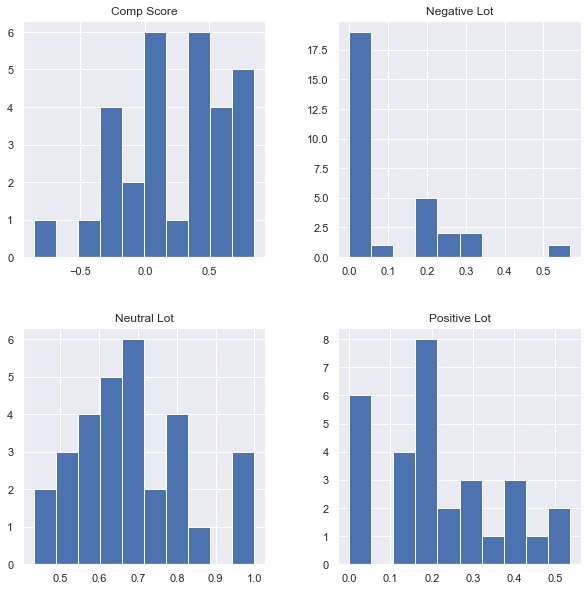

In [643]:
caption = 'Comp Score represents the Final Score while the word \'Lot\' refers to the % allocated.'
sns.set_style('darkgrid')
news_eda_sia.hist(bins = 10,figsize=(10,10))
fig.text(.5, .5, caption, ha='center')

Visually, the **skewness may be summarized as**:
   * **Left** | `Comp Score`
   * **Right** | `Negative` & `Positive Lot`(s)

The `Neutral Lot` has no visual skewness. 

In [644]:
print('Skewness:','\n''\n',
      'Comp Score |', round(skew(news_eda_sia['Comp Score']),2),'\n',
     'Negative Score |', round(skew(news_eda_sia['Negative Lot']),2),'\n',
     'Positive |', round(skew(news_eda_sia['Positive Lot']),2),'\n',
     'Neutral |', round(skew(news_eda_sia['Neutral Lot']),2),)

Skewness: 

 Comp Score | -0.35 
 Negative Score | 1.52 
 Positive | 0.28 
 Neutral | 0.54


The actual numbers paint a "slightly different" story with my visual opinion & possible rational for them below:
   * `Comp Score` | Newspapers might sell a little more on fear.
   * `Negative Lot` | Same as Comp Score.
   * `Positive Lot` | Looks Normally Distributed.
   * `Neutral Lot` | Notable findings are unlikely to present themselves in 1-3 sentences

**Let's see what the numbers for the Comp Score are based on whether or not it's reported by China or International sources**. 

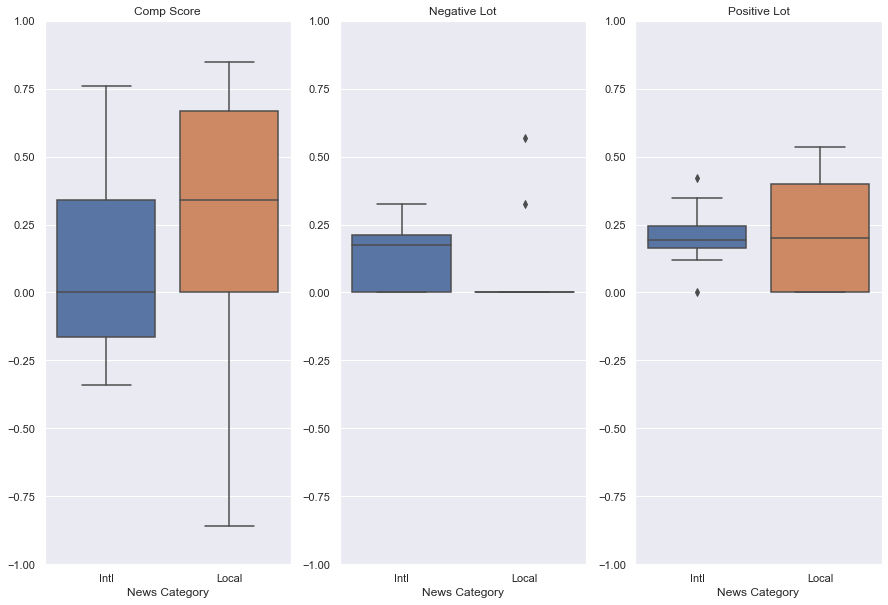

In [645]:
#Box Plot review of news location source
fig, ax = plt.subplots(1,3, figsize=(15,10))
a = sns.boxplot(ax=ax[0], x="local", y="comp_title", data=news_title_tfidf_wordc)
a.set(title='Comp Score')
a.set(xlabel='News Category', ylabel='')
a.set(ylim=(-1, 1))

b = sns.boxplot(ax=ax[1],x="local", y="neg_title", data=news_title_tfidf_wordc)
b.set(title='Negative Lot')
b.set(xlabel='News Category', ylabel='')
b.set(ylim=(-1, 1))

c = sns.boxplot(ax=ax[2],x = "local", y="pos_title", data=news_title_tfidf_wordc)
c.set(title='Positive Lot')
c.set(xlabel='News Category', ylabel='')
c.set(ylim=(-1, 1))

plt.show()

The noticeable observation here is the concentration of `Local` ( China ) at 0 in the negative category; which may justify the outliers in the **Comp Score**. Let's take a look at this.

In [646]:
l_zero_c = news_title_tfidf_wordc[(news_title_tfidf_wordc.neg_title == 0) & (news_title_tfidf_wordc.local == 'Local')].shape[0]
i_zero_c = news_title_tfidf_wordc[(news_title_tfidf_wordc.neg_title == 0) & (news_title_tfidf_wordc.local == 'Intl')].shape[0]
l_total = (news_title_tfidf_wordc.local == 'Local').sum()
print(round(((l_zero_c/l_total)*100),2), 'percent of the Local category registered a Zero, compared to',
     round(((i_zero_c/(len(news_title_tfidf_wordc)/2))*100),2), 'percent of their International counterparts.')

86.67 percent of the Local category registered a Zero, compared to 40.0 percent of their International counterparts.


We will now look at the Top & Bottom Titles for the Comp Scores.

Text(0.5, 1.0, 'Top 5 Comp Scores')

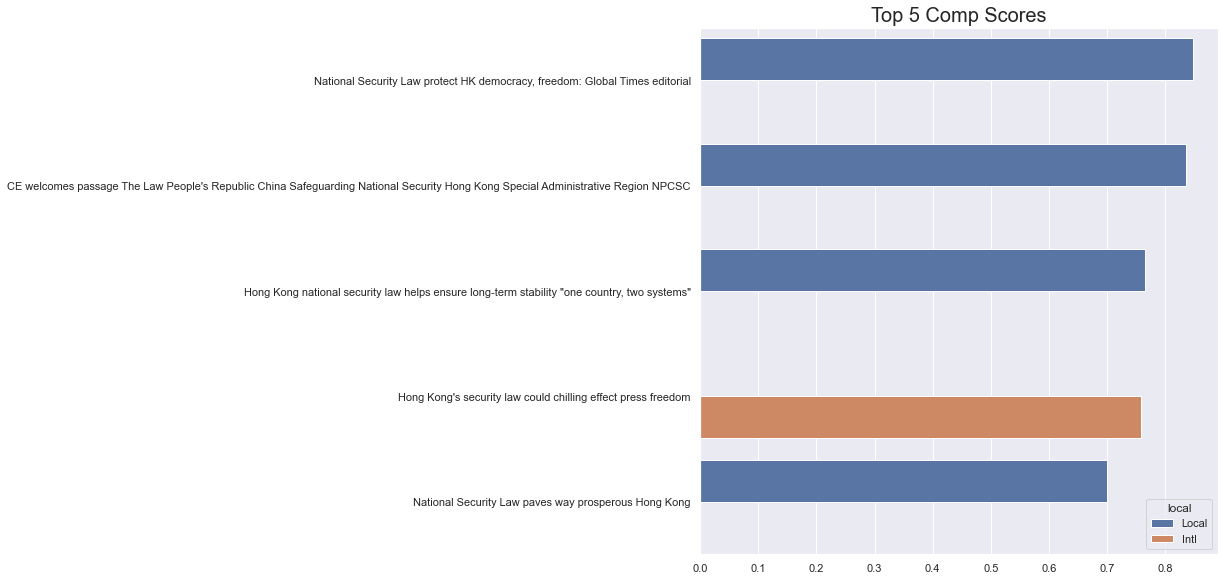

In [647]:
#Top 5 Comp Scores
# t_bar_title = pd.DataFrame(news_title_tdif_wordc.title[:20])
fig, ax = plt.subplots(figsize=(8, 8))
fig.tight_layout()
sns.barplot(y = 'title',x = 'comp_title',hue="local",
            data = news_title_tfidf_wordc.sort_values('comp_title',ascending = False).head(5))
plt.xlabel("")
plt.ylabel("")
plt.title("Top 5 Comp Scores",fontsize=20)

The **Local news dominated the Highest Scores** with with a **common thread that the National Security Law will**:
   * Protect democracy & freedom in Hong Kong
   * Lead to stability & prosperity

Text(0.5, 1.0, 'Bottom 5 Comp Scores')

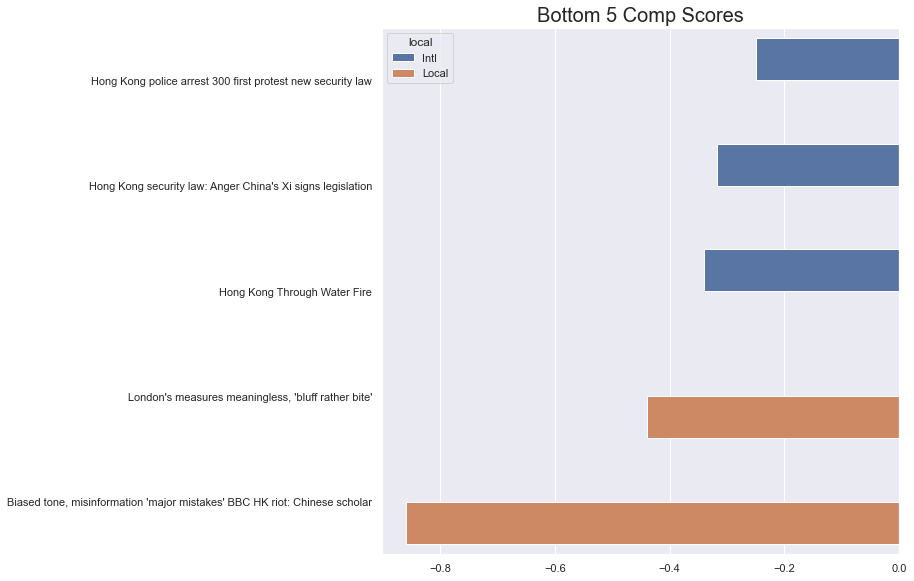

In [648]:
#Bottom 5 Comp Scores
# t_bar_title = pd.DataFrame(news_title_tdif_wordc.title[:20])
fig, ax = plt.subplots(figsize=(8, 8))
fig.tight_layout()
sns.barplot(y = 'title',x = 'comp_title',hue="local",
            data = news_title_tfidf_wordc.sort_values('comp_title',ascending = False).tail(5))
plt.xlabel("")
plt.ylabel("")
plt.title("Bottom 5 Comp Scores",fontsize=20)

Conversely, the **International news held the most in the Lowest Scores** with with a **common thread that the National Security Law**:
   * Led to anger 
   * A more definative stance by China
   * Hong Kong's future looks volatile

The **Local news common thread** at the bottom are that **London & the BBC are bluffing & misinformed respectively**.

In [649]:
# we will first convert the text from all the titles into one string.
text_title = ''.join(news_title_tfidf_wordc['title'])

In [650]:
# We then load the spaCy model to parse the text string int
nlp = spacy.load('en_core_web_sm')
doc = nlp(text_title)

The code below if for reference.

In [651]:
# checking words & their word types
#for word in doc:
#    print(word.text, word.pos_, word.dep_)


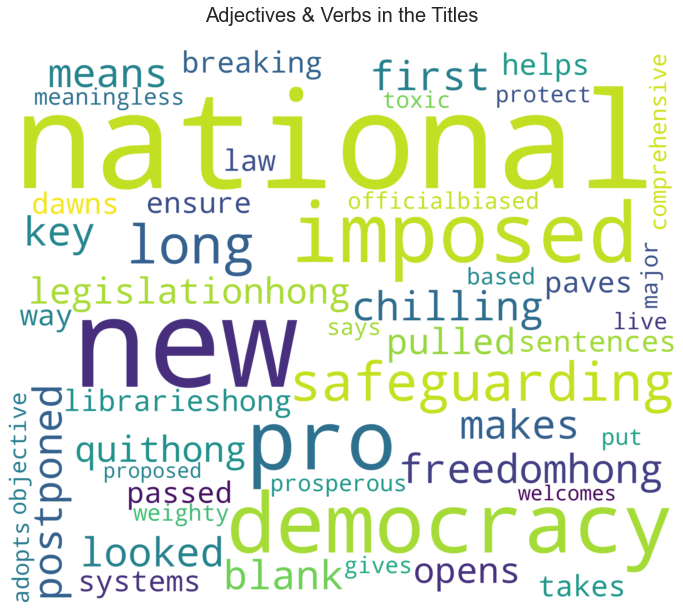

In [652]:
newText_t_adj_v =''
for word in doc:
    if word.pos_ in ['ADJ','VERB']:
        newText_t_adj_v = ' '.join((newText_t_adj_v, word.text.lower()))

wordcloud_title = WordCloud(stopwords=STOPWORDS,background_color='white',width=2400,height=2000).generate(newText_t_adj_v)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Adjectives & Verbs in the Titles\n', fontsize=20)
plt.axis('off')
plt.show()

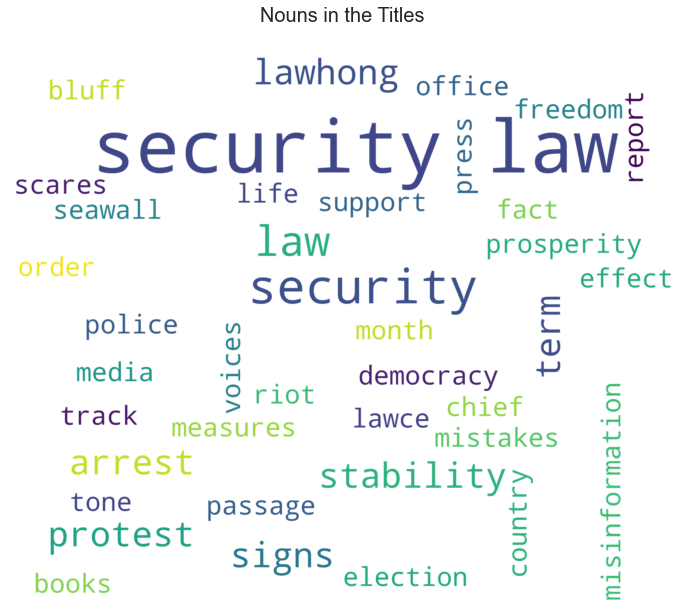

In [653]:
newText_t_n =''
for word in doc:
    if word.pos_ in ['NOUN']:
        newText_t_n = ' '.join((newText_t_n, word.text.lower()))

wordcloud_title = WordCloud(stopwords=STOPWORDS,background_color='white',width=2400,height=2000).generate(newText_t_n)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Nouns in the Titles\n', fontsize=20)
plt.axis('off')
plt.show()

We will now move to the Article.

# **2.3 Article EDA**<a id='article_eda'></a>

**Data Defined**

In this short section, we will highlight what the columns are referring too.

Here are the data frames we will be working with herein:
   * **Article | MAIN**
     * `news_article`
   * **Article | TfidfVectorizer**
     * `news_article_tfidf`
   * **Article | CountVectorizer**
     * `news_article_cvec`


In [654]:
news_article_tfidf_wordc = news_article_tfidf.copy()

Confirming again there are not duplicates.

In [655]:
news_article_tfidf_wordc_null_list = news_article_tfidf_wordc.columns[news_article_tfidf_wordc.isnull().any()].tolist()
news_article_tfidf_wordc_null_list

[]

In [656]:
news_article_tfidf_wordc.describe()

,comp_article,neg_article,neu_article,pos_article,00,000,00pm,10,100,11,...,youtube,yu,yuen,zealand,zhang,zhanshu,zhao,zheng,ziyang,zte
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.328187,0.084167,0.802767,0.113167,0.006686,0.007727,0.001086,0.007095,0.003181,0.007364,...,0.001415,0.002988,0.000671,0.000752,0.012531,0.003395,0.008069,0.002671,0.001785,0.001279
std,0.904335,0.034967,0.035669,0.037927,0.019430,0.016165,0.005950,0.013324,0.013616,0.015727,...,0.007751,0.011894,0.003677,0.004117,0.057447,0.018593,0.032275,0.014629,0.009775,0.007005
min,-0.997900,0.013000,0.710000,0.057000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.807825,0.066500,0.772500,0.087500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.969500,0.083000,0.799000,0.106500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.995800,0.102000,0.831500,0.126500,0.000000,0.000000,0.000000,0.007040,0.000000,0.007040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.999600,0.142000,0.860000,0.207000,0.073941,0.067395,0.032590,0.040717,0.071444,0.059599,...,0.042453,0.058114,0.020138,0.022547,0.313375,0.101840,0.171913,0.080129,0.053537,0.038366


There's a lot to work with in here. **We will start with the `SentimentIntensityAnalyzer` #'s.**

In [657]:
news_a_eda_sia = news_article_tfidf_wordc[['comp_article','neg_article','neu_article','pos_article']].copy()
news_a_eda_sia.columns = ['Comp Score','Negative Lot','Neutral Lot','Positive Lot']

Histograms are an excellent way to review the range and density of values for each numeric features in the data set.

Text(0.5, 0.5, "Comp Score represents the Final Score while the word 'Lot' refers to the % allocated.")

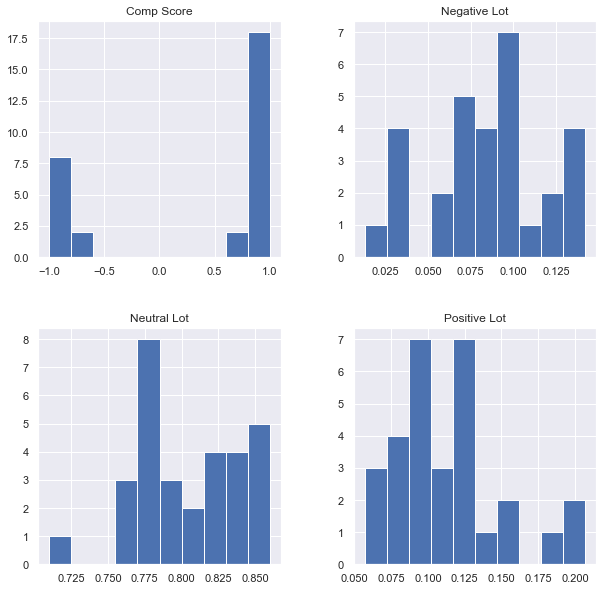

In [658]:
caption = 'Comp Score represents the Final Score while the word \'Lot\' refers to the % allocated.'
sns.set_style('darkgrid')
news_a_eda_sia.hist(bins = 10,figsize=(10,10))
fig.text(.5, .5, caption, ha='center')

Visually, **skewness is one thing, Polarity with the `Comp Score` is another** Let's take a look at what a box plot displays.

In [659]:
# there are 2 columns named sharing the same names so we will assign the main section of the dataframe to a new name
news_article_tfidf_wordc.columns.values[4] = "local_main_new"
news_article_tfidf_wordc.columns.values[5] = "article_main"
news_article_tfidf_wordc.columns.values[2] = "source_main"

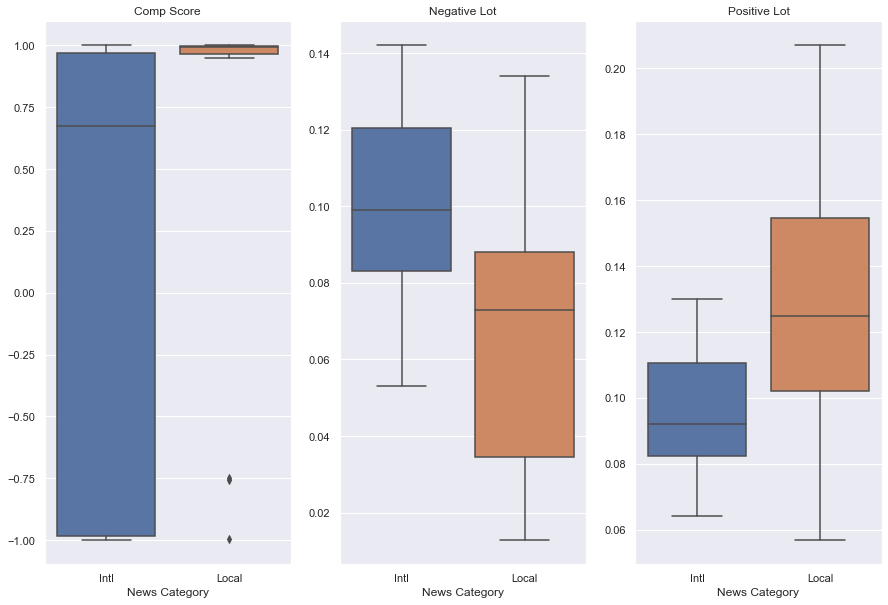

In [660]:
#Box Plot review of news location source
fig, ax = plt.subplots(1,3, figsize=(15,10))
d = sns.boxplot(ax=ax[0], x="local_main_new", y="comp_article", data=news_article_tfidf_wordc)
d.set(title='Comp Score')
d.set(xlabel='News Category', ylabel='')
# d.set(ylim=(-1, 1))

e = sns.boxplot(ax=ax[1],x="local_main_new", y="neg_article", data=news_article_tfidf_wordc)
e.set(title='Negative Lot')
e.set(xlabel='News Category', ylabel='')
# e.set(ylim=(-1, 1))

f = sns.boxplot(ax=ax[2],x = "local_main_new", y="pos_article", data=news_article_tfidf_wordc)
f.set(title='Positive Lot')
f.set(xlabel='News Category', ylabel='')
# f.set(ylim=(-1, 1))

plt.show()

The noticeable observation here is the splits between the `Positive Lot` & `Negative Lot` & their Categories. To summarize:
   * Negative is heavily weight in the International Category &
   * Positive is heavily weight in the Local Category

We will now look at the Top & Bottom Titles for the Comp Scores.

Text(0.5, 1.0, 'Top 5 Comp Scores')

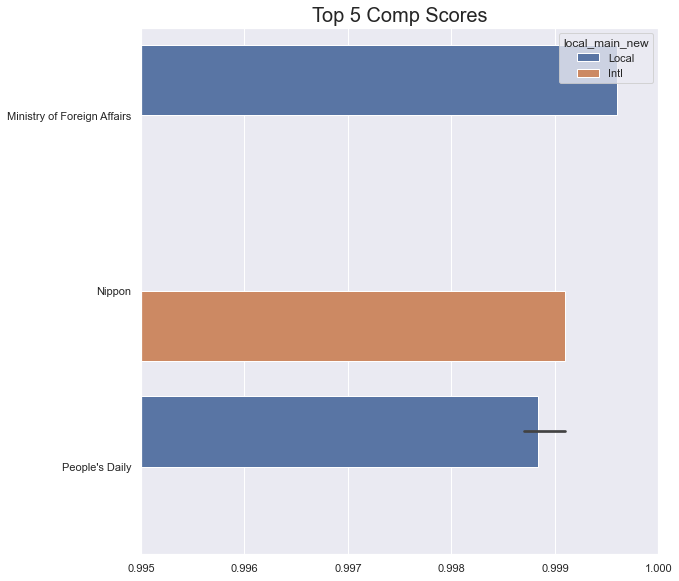

In [661]:
#Top 5 Comp Scores
# t_bar_title = pd.DataFrame(news_title_tdif_wordc.title[:20])
fig, ax = plt.subplots(figsize=(8, 8))
fig.tight_layout()
sns.barplot(y = 'source_main',x = 'comp_article',hue="local_main_new",
            data = news_article_tfidf_wordc.sort_values('comp_article',ascending = False).head())
plt.xlabel("")
plt.ylabel("")
plt.xlim(0.995,1)
plt.title("Top 5 Comp Scores",fontsize=20)

I am unable to show the articles in full on the y axis; thus the News Source was used. We will go into more detail in Section 2.4.

Text(0.5, 1.0, 'Bottom 5 Comp Scores')

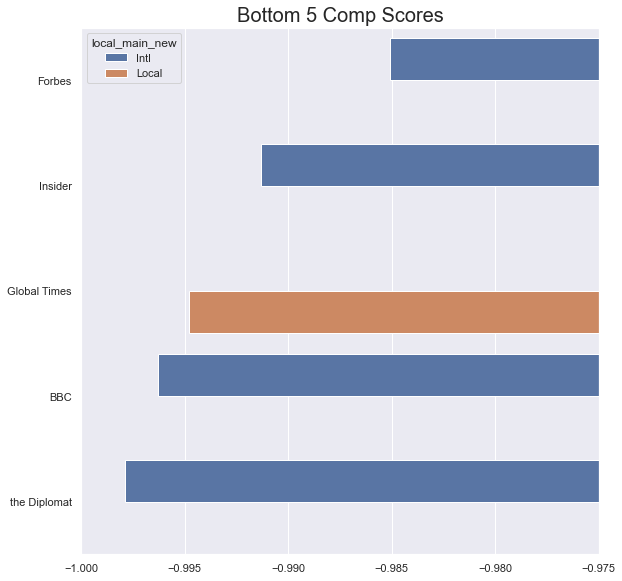

In [662]:
#Bottom 5 Comp Scores
# t_bar_title = pd.DataFrame(news_title_tdif_wordc.title[:20])
fig, ax = plt.subplots(figsize=(8, 8))
fig.tight_layout()
sns.barplot(y = 'source_main',x = 'comp_article',hue="local_main_new",
            data = news_article_tfidf_wordc.sort_values('comp_article',ascending = False).tail(5))
plt.xlabel("")
plt.ylabel("")
plt.xlim(-1,-0.975)
plt.title("Bottom 5 Comp Scores",fontsize=20)

I am unable to show the articles in full on the y axis; thus the News Source was used. We will go into more detail in Section 2.4.

In [663]:
# we will first convert the text from all the titles into one string.
text_article = ''.join(news_article_tfidf_wordc['article_main'])

In [664]:
# We then load the spaCy model to parse the text string int
nlp = spacy.load('en_core_web_sm')
doc = nlp(text_article)

In [665]:
# checking words & their word types

#for word in doc:
#    print(word.text, word.pos_, word.dep_)


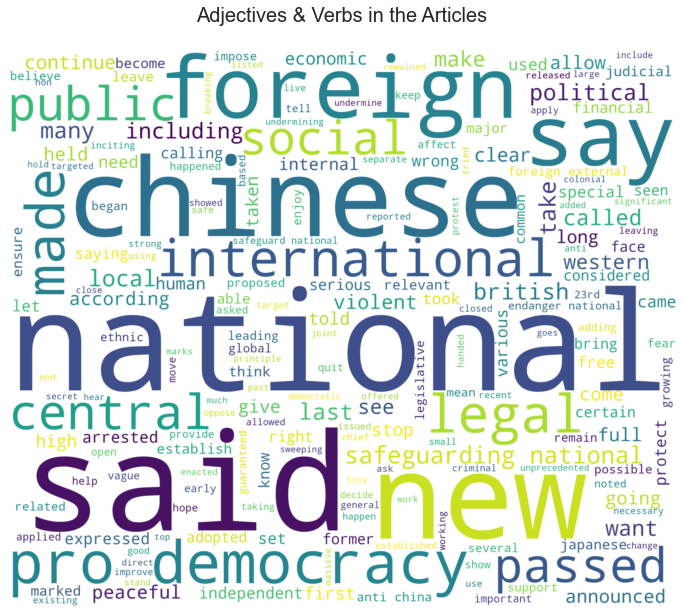

In [666]:
newText_adj_verb =''
for word in doc:
    if word.pos_ in ['ADJ','VERB']:
        newText_adj_verb = ' '.join((newText_adj_verb, word.text.lower()))

wordcloud_title = WordCloud(stopwords=STOPWORDS,background_color='white',width=2400,height=2000).generate(newText_adj_verb)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Adjectives & Verbs in the Articles\n', fontsize=20)
plt.axis('off')
plt.show()

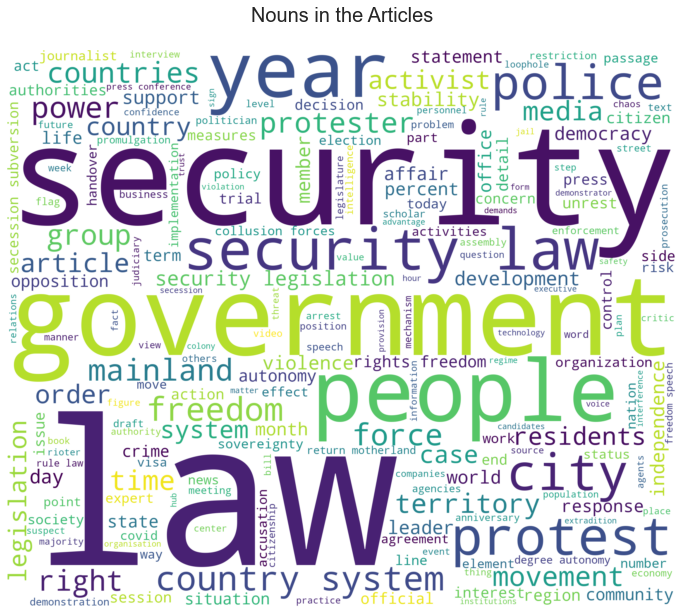

In [667]:
newText_noun =''
for word in doc:
    if word.pos_ in ['NOUN']:
        newText_noun = ' '.join((newText_noun, word.text.lower()))

wordcloud_title = WordCloud(stopwords=STOPWORDS,background_color='white',width=2400,height=2000).generate(newText_noun)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Nouns in the Articles\n', fontsize=20)
plt.axis('off')
plt.show()

We will now look at them side by side.

# **2.4 Overall EDA**<a id='overall_eda'></a>

A lot has changed with the data frames. I will show the updated names below:
   * `news_title_tfidf_wordc`
   * `news_title_cvec`
   * `news_article_tfidf_wordc`
   * `news_article_cvec`


We will first establish **a combination of the `Title` & `Article` together** in this section.

In [668]:
#establishing new data frame
news_t_eda = news_title_tfidf[['file_name', 'date', 'source', 'country', 'local', 'title',
       'comp_title', 'neg_title', 'neu_title', 'pos_title']].copy()
news_a_eda = news_article_tfidf[['file_name', 'date', 'source_main', 'country', 'local_main_new', 'article_main',
       'comp_article', 'neg_article', 'neu_article', 'pos_article']].copy()

news_eda = pd.DataFrame([])
news_eda = pd.concat([news_t_eda['file_name'],news_t_eda['date'],news_t_eda['source'],news_t_eda['country'],
                      news_t_eda['local'],news_t_eda['title'],news_a_eda['article_main'],
                      news_t_eda['comp_title'],news_t_eda['neg_title'],news_t_eda['neu_title'],news_t_eda['pos_title'],
                      news_a_eda['comp_article'],news_a_eda['neg_article'],news_a_eda['neu_article'],news_a_eda['pos_article']],
                    axis=1, ignore_index=False)


Let's first look at how the Comp scores compare with each other between the `Article` & `Title`.

Text(0, 0.5, 'Title Score')

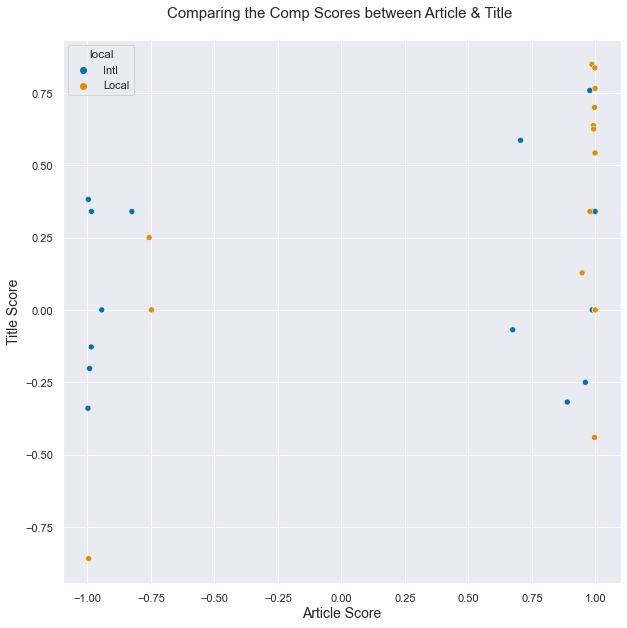

In [669]:
# scatter plot
fig, ax = plt.subplots(figsize=(10,10))
legend_labels = ax.get_legend_handles_labels()

plt.title('Comparing the Comp Scores between Article & Title \n', fontsize=15)

sns.scatterplot(data=news_eda,
                x="comp_article", y="comp_title",
               hue='local', palette='colorblind', legend='full')
plt.xlabel('Article Score', fontsize=14)
plt.ylabel('Title Score', fontsize=14)


The definative split in the Aricle Score was previously known but ownership between the splits is marginally categorized as:
   * +50% ( Positive Sentiment ) Local ( China )
   * -50% ( Negative Sentiment ) Intl ( International )

But this isn't as definative as one would believe. Let's look at the numbers for this.

In [670]:
art_l_ab = news_eda.loc[(news_eda.comp_article >= 0.5) & (news_eda['local'] == "Local")]
art_i_ab = news_eda.loc[(news_eda.comp_article >= 0.5) & (news_eda['local'] == "Intl")]
art_l_bel = news_eda.loc[(news_eda.comp_article <= -0.5) & (news_eda['local'] == "Local")]
art_i_bel = news_eda.loc[(news_eda.comp_article <= -0.5) & (news_eda['local'] == "Intl")]
a_above = news_eda.loc[(news_eda['comp_article'] >= 0.5)]
b_below = news_eda.loc[news_eda['comp_article'] <= 0.5]

print('',len(a_above),'| Articles above 50%','\n',
     len(b_below),'| Articles below -50%''\n','\n',
     'The breakdown between groups +50%:','\n',
     'China |', round((len(art_l_ab)/len(a_above)*100),2),'percent','\n',
      'Intl  |', round((len(art_i_ab)/len(a_above)*100),2),'percent','\n','\n',
       'The breakdown between groups -50%:','\n',
     'China |', round((len(art_l_bel)/len(b_below)*100),2),'percent','\n',
      'Intl  |', round((len(art_i_bel)/len(b_below)*100),2),'percent'
     )

 20 | Articles above 50% 
 10 | Articles below -50%
 
 The breakdown between groups +50%: 
 China | 60.0 percent 
 Intl  | 40.0 percent 
 
 The breakdown between groups -50%: 
 China | 30.0 percent 
 Intl  | 70.0 percent


There is a categorical split as the **International news held the most of the Lowest Scores** with & **Local (China) news held a marginal majority in the positive category**.

As news articles are too large to display, we will take a look at the article scores with the titles in a similar fashion as the bar chart in the previous sections to their respective majorities; notably:
   * International Negative
   * China Positive

Text(0.5, 1.0, "Negative Articles & Titles by Int'l Sources")

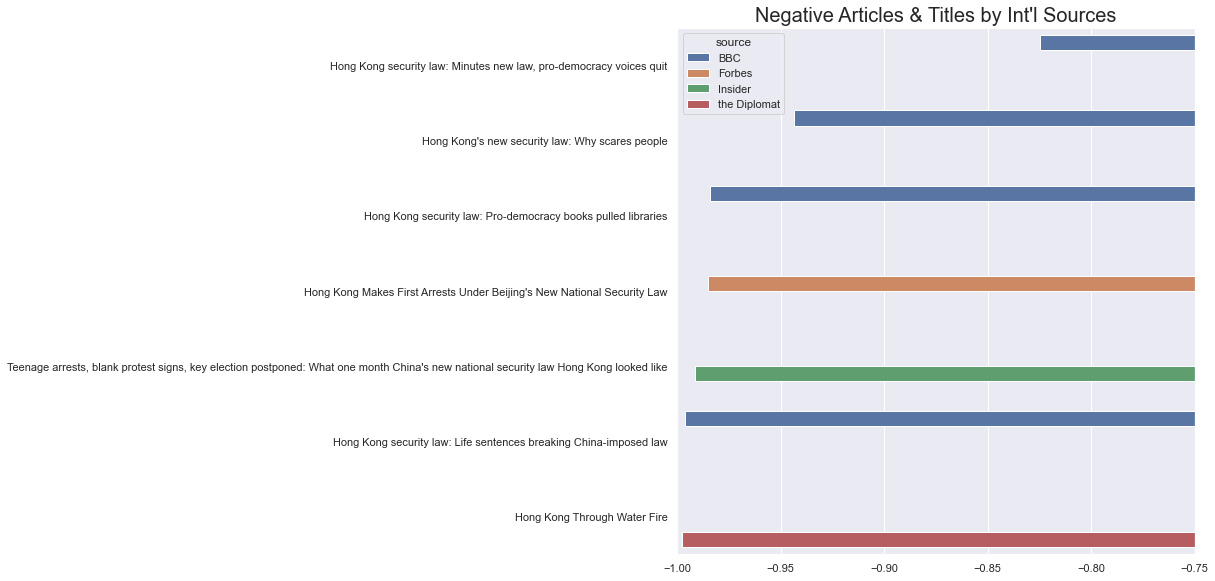

In [671]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.tight_layout()
sns.barplot(y = 'title',x = 'comp_article',hue="source",
            data = art_i_bel.sort_values('comp_article',ascending = False).tail(10))
plt.xlabel("")
plt.ylabel("")
plt.xlim(-1,-0.75)
plt.title("Negative Articles & Titles by Int\'l Sources",fontsize=20)

Text(0.5, 1.0, 'Positive Articles & Titles by China Sources')

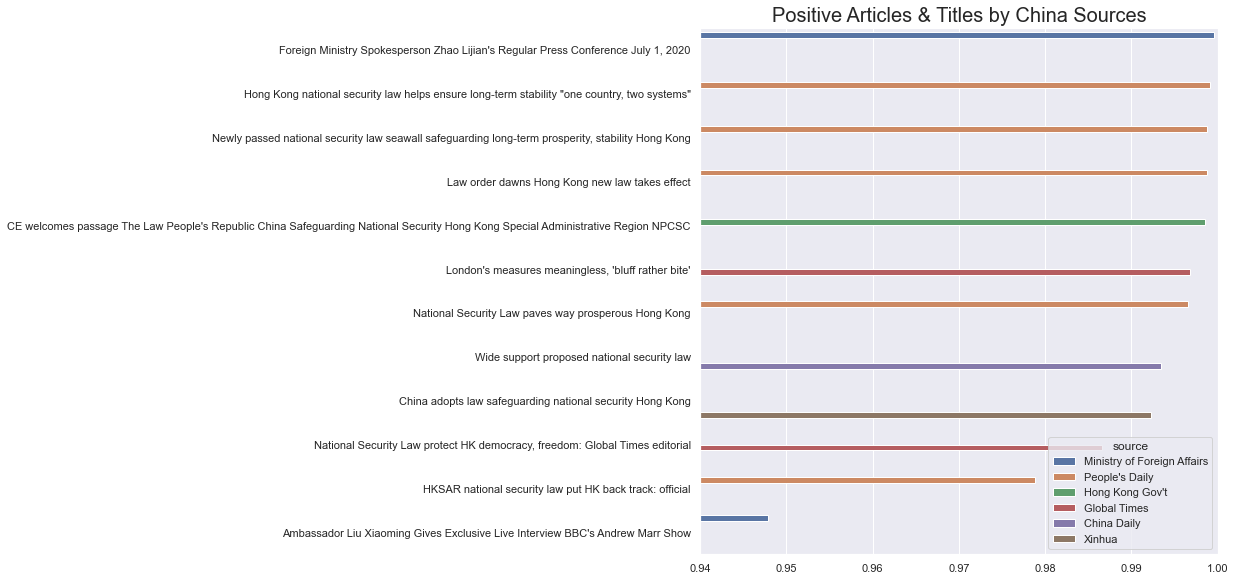

In [672]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.tight_layout()
sns.barplot(y = 'title',x = 'comp_article',hue="source",
            data = art_l_ab.sort_values('comp_article',ascending = False).tail(12))
plt.xlabel("")
plt.ylabel("")
plt.xlim(0.94,1)
plt.title("Positive Articles & Titles by China Sources",fontsize=20)

**Summary** | The notable citiation differences outlied below:
   * **Int'l Negative** | political activists quitting, censorship in reading materials & confrontations with police
   * **Chinese Positive** | the Law protects & supports Hong Kong's democracy & freedom, will lead to prosperity & the wide support in Hong Kong for it
   
Moving over to what we can call the outliers; notably:
   * International Positive
   * China Negative

Text(0.5, 1.0, "Positive Articles & Titles by Int'l Sources")

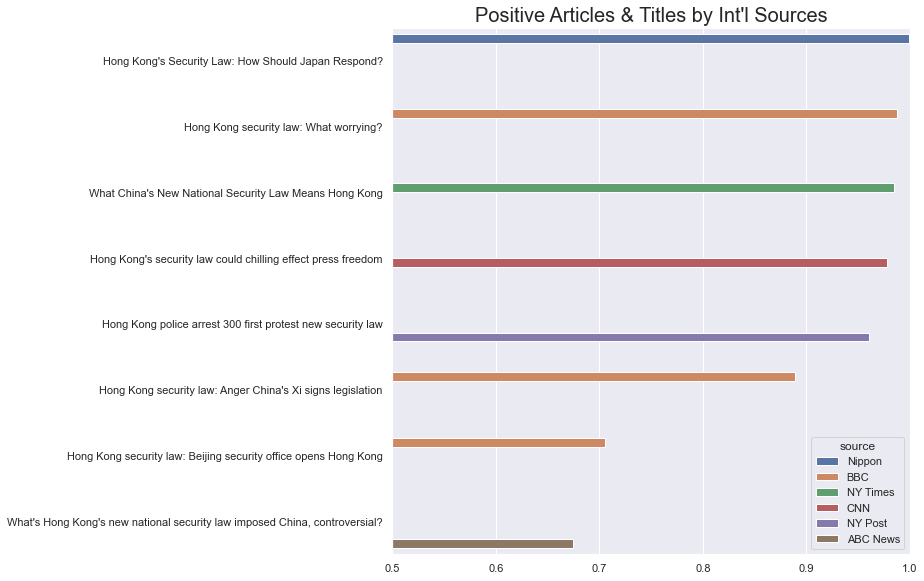

In [673]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.tight_layout()
sns.barplot(y = 'title',x = 'comp_article',hue="source",
            data = art_i_ab.sort_values('comp_article',ascending = False).tail(10))
plt.xlabel("")
plt.ylabel("")
plt.xlim(0.5,1)
plt.title("Positive Articles & Titles by Int\'l Sources",fontsize=20)

Text(0.5, 1.0, 'Negative Articles & Titles by China Sources')

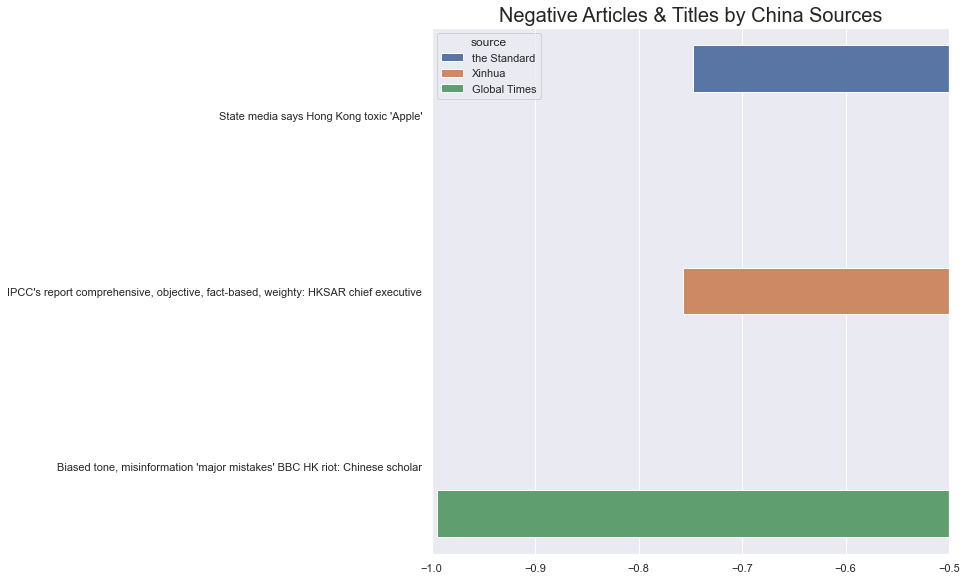

In [674]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.tight_layout()
sns.barplot(y = 'title',x = 'comp_article',hue="source",
            data = art_l_bel.sort_values('comp_article',ascending = False).tail(10))
plt.xlabel("")
plt.ylabel("")
plt.xlim(-1,-0.5)
plt.title("Negative Articles & Titles by China Sources",fontsize=20)

**Summary** | The notable citiation differences outlied below:
   * **Int'l Positive** | The Titles don't convey much positivity; to be confirmed.
   * **Chinese Negative** | The BBC are misinformed & present a comprehensive / objective report from the Chief Executive of HK


In [675]:
news_article_cvec_test_2 = news_article_cvec.copy()
#news_a_cv_test_T = news_a_cv_test.T
news_article_cvec_test_2.head(1)
#news_a_cv_test_T.head(15)

,file_name,date,source,country,local,article,comp_article,neg_article,neu_article,pos_article,...,youtube,yu,yuen,zealand,zhang,zhanshu,zhao,zheng,ziyang,zte
0,bbc_1,2020-06-30,BBC,UK,Intl,China passed wide-ranging new security law Hon...,0.9878,0.092,0.784,0.124,...,0,0,0,0,0,0,0,0,0,0


In [676]:
import squarify

In [683]:
newText_adj_verb_list = list(newText_adj_verb)

In [687]:
# newText_adj_verb_list

Cell below, he outlined only goals above 0. **Rand |** I don't think you have to do this.

In [677]:
# dataGoals = data[data["G"]>0]

First line he told matplot lib the range for the colors. **Rand |** Turn Local & Intl to 0,1 repectively.

Second line, he called on Blue as the color. **Rand |** Resolved above.

In [678]:
#####Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
#norm = matplotlib.colors.Normalize(vmin=min(dataGoals.G), vmax=max(dataGoals.G))
#colors = [matplotlib.cm.Blues(norm(value)) for value in dataGoals.G]


Label = how it should be split. **Rand |** Should be 'local' but that needs to be reassigned.

Sizes = the size of the 'box' **Rand |** 

Color = he defined above. **Rand |** above.

In [680]:
####Create our plot and resize it.
#fig = plt.gcf()
#ax = fig.add_subplot()
#fig.set_size_inches(16, 4.5)

####Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
#squarify.plot(label=dataGoals.Player,sizes=dataGoals.G, color = colors, alpha=.6)
#plt.title("Man City Goals",fontsize=23,fontweight="bold")

####Remove our axes and display the plot
#plt.axis('off')
#plt.show()


# Next :: take a look & go deep into how others do it............

# **2.5 EDA Summary**<a id='eda_summary'></a>